# Importando bibliotecas

In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from multiprocess import Pool,cpu_count
from datetime import datetime
from time import sleep
from random import randint
import math
from multiprocess import Pool,cpu_count
import rawgpy
from fuzzywuzzy import fuzz
import seaborn as sns
import matplotlib.pyplot as plt

# Coletando informações das promoções em vigor do psdeals.com

## Teste para aprender coletar informações de uma página

In [54]:
url='https://psndeals.com/ps4-store-br-all-deals/'
response=requests.get(url)
soup=BeautifulSoup(response.content)
soup

# Formato para automatizar com o for https://psndeals.com/ps4-store-br-all-deals/page/2/

<!DOCTYPE html>
<html lang="pt-BR">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<script async="" data-ad-client="ca-pub-3940390132791064" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<meta content="#202020" name="theme-color"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/images/apple/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="/images/apple/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/images/apple/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/images/apple/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/images/apple/apple-touch-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/images/apple/apple-touch-icon-120x120

In [9]:
#games_titles=[x.find_all('a')[0].attrs['title'] for x in soup.find_all('div',attrs={'class':'game-card-body'})]
soup.find_all('div',attrs={'class':'game-card-body'})[0].find_all('a')[0].attrs['title']

'Warface: Breakout'

In [42]:
len(games_titles)

54

In [255]:
soup.find_all('div',attrs={'class':'game-card-body'})[27].find_all('span')#[0].attrs['class']#[1]

[<span class="flag-icon flag-icon-fire"></span>,
 <span class="new-price">R$ 31,96 </span>,
 <span class="flag-icon flag-icon-plus"></span>,
 <span class="new-bonus-price">R$ 19,97 </span>,
 <span class="original-price crossed">R$ 79,90</span>]

In [10]:
#Lista de preços promocionais

promotional_price=[]
for i in range(len(games_titles)):
    try:
        promotional_price.append(soup.find_all('div',attrs={'class':'game-card-body'})[i].find_all('span',attrs={'class':'new-price'})[0].text.strip().replace(u'\xa0', u' '))
    except:
        promotional_price.append(0)

In [11]:
promotional_price

[0,
 0,
 'R$ 122,00',
 'R$ 147,59',
 'R$ 169,45',
 'R$ 62,47',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'R$ 99,80',
 0,
 'R$ 25,97',
 'R$ 12,45',
 'R$ 305,83',
 'R$ 14,97',
 'R$ 9,95',
 'R$ 82,45',
 'R$ 250,74',
 'R$ 143,94',
 'R$ 31,96',
 'R$ 13,45',
 'R$ 13,45',
 'R$ 149,70',
 'R$ 107,47',
 'R$ 239,70',
 'R$ 139,96',
 'R$ 52,45',
 'R$ 41,75',
 'R$ 103,95',
 'R$ 14,79',
 'R$ 139,65',
 'R$ 149,94',
 'R$ 158,94',
 'R$ 50,00',
 'R$ 149,94',
 'R$ 74,62',
 'R$ 97,17',
 'R$ 99,96',
 'R$ 12,10',
 'R$ 71,85',
 'R$ 124,74',
 'R$ 44,97',
 'R$ 133,16',
 'R$ 10,37',
 'R$ 26,95',
 'R$ 62,45',
 'R$ 112,47',
 'R$ 107,45']

In [12]:
#Lista de preços promocionais da ps plus

psplus_price=[]
for i in range(len(games_titles)):
    try:
        psplus_price.append(soup.find_all('div',attrs={'class':'game-card-body'})[i].find_all('span',attrs={'class':'new-bonus-price'})[0].text.strip().replace(u'\xa0', u' '))
    except:
        psplus_price.append(0)

In [13]:
psplus_price

['R$ 62,91',
 'R$ 120,51',
 0,
 0,
 0,
 0,
 'R$ 143,91',
 'R$ 63,92',
 'R$ 83,92',
 'R$ 193,41',
 'R$ 193,41',
 'R$ 434,61',
 'R$ 193,41',
 'R$ 89,55',
 'R$ 159,60',
 0,
 'R$ 83,92',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'R$ 19,97',
 0,
 0,
 0,
 0,
 0,
 'R$ 122,46',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'R$ 74,98',
 0]

In [24]:
games_original_prices=[x.find_all('span',attrs={'class':'original-price'})[0].text.strip().replace(u'\xa0', u' ') for x in soup.find_all('div',attrs={'class':'game-card-body'})]
#soup.find_all('div',attrs={'class':'game-card-body'})[0].find_all('span',attrs={'class':'original-price'})[0].text.strip().replace(u'\xa0', u' ')

In [25]:
games_original_prices

['R$ 69,90',
 'R$ 133,90',
 'R$ 338,90',
 'R$ 398,90',
 'R$ 338,90',
 'R$ 249,90',
 'R$ 159,90',
 'R$ 79,90',
 'R$ 104,90',
 'R$ 214,90',
 'R$ 214,90',
 'R$ 482,90',
 'R$ 214,90',
 'R$ 99,50',
 'R$ 199,50',
 'R$ 249,50',
 'R$ 104,90',
 'R$ 103,90',
 'R$ 41,50',
 'R$ 436,90',
 'R$ 49,90',
 'R$ 19,90',
 'R$ 164,90',
 'R$ 417,90',
 'R$ 239,90',
 'R$ 79,90',
 'R$ 26,90',
 'R$ 26,90',
 'R$ 249,50',
 'R$ 429,90',
 'R$ 399,50',
 'R$ 349,90',
 'R$ 104,90',
 'R$ 83,50',
 'R$ 207,90',
 'R$ 26,90',
 'R$ 199,50',
 'R$ 249,90',
 'R$ 264,90',
 'R$ 62,50',
 'R$ 249,90',
 'R$ 99,50',
 'R$ 149,50',
 'R$ 249,90',
 'R$ 26,90',
 'R$ 239,50',
 'R$ 207,90',
 'R$ 179,90',
 'R$ 332,90',
 'R$ 41,50',
 'R$ 53,90',
 'R$ 124,90',
 'R$ 374,90',
 'R$ 214,90']

In [31]:
psdeals=pd.DataFrame([games_titles,games_original_prices,promotional_price,psplus_price]).T

In [32]:
psdeals.columns=['Title','Original Price','Promotional Price', 'Psplus Price']

In [38]:
mask=psdeals.loc[:,'Promotional Price']==0
psdeals.loc[mask,'Promotional Price']=psdeals.loc[mask,'Original Price']

In [40]:
mask=psdeals.loc[:,'Psplus Price']==0
psdeals.loc[mask,'Psplus Price']=psdeals.loc[mask,'Promotional Price']

In [41]:
psdeals

,Title,Original Price,Promotional Price,Psplus Price
0,I Saw Black Clouds,"R$ 69,90","R$ 69,90","R$ 62,91"
1,Narita Boy,"R$ 133,90","R$ 133,90","R$ 120,51"
2,NHL™ 21 Deluxe Edition,"R$ 338,90","R$ 122,00","R$ 122,00"
3,NHL™ 21 Great Eight Edition,"R$ 398,90","R$ 147,59","R$ 147,59"
4,UFC® 4 Edição Deluxe,"R$ 338,90","R$ 169,45","R$ 169,45"
5,Sid Meier’s Civilization VI,"R$ 249,90","R$ 62,47","R$ 62,47"
6,Black Legend,"R$ 159,90","R$ 159,90","R$ 143,91"
7,Paradise Lost,"R$ 79,90","R$ 79,90","R$ 63,92"
8,Arkham Horror: Mother’s Embrace,"R$ 104,90","R$ 104,90","R$ 83,92"
9,Atelier Firis: The Alchemist and ...,"R$ 214,90","R$ 214,90","R$ 193,41"


## Criando funções para coleta dos dados de promoção e organização do dataframe

In [10]:
def GetGameData(url):
    
    response=requests.get(url)
    soup=BeautifulSoup(response.content)
    soup
    
    sleep(randint(2, 10))
    
    games_titles=[x.find_all('a')[0].attrs['title'] for x in soup.find_all('div',attrs={'class':'game-card-body'})]
    
    promotional_price=[]
    for i in range(len(games_titles)):
        try:
            promotional_price.append(soup.find_all('div',attrs={'class':'game-card-body'})[i].find_all('span',attrs={'class':'new-price'})[0].text.strip().replace(u'\xa0', u' '))
        except:
            promotional_price.append(0)
    
    psplus_price=[]
    for i in range(len(games_titles)):
        try:
            psplus_price.append(soup.find_all('div',attrs={'class':'game-card-body'})[i].find_all('span',attrs={'class':'new-bonus-price'})[0].text.strip().replace(u'\xa0', u' '))
        except:
            psplus_price.append(0)
    
    games_original_prices=[]
    for i in range(len(games_titles)):
        try:
            games_original_prices.append(soup.find_all('div',attrs={'class':'game-card-body'})[i].find_all('span',attrs={'class':'original-price'})[0].text.strip().replace(u'\xa0', u' '))
        except:
            games_original_prices.append(0)
    
    url_games=[]       
    for i in range(len(games_titles)):
        url_games.append(soup.find_all('div',attrs={'class':'game-card-body'})[i].find_all('a')[0].attrs['href'])
    
    return games_titles,games_original_prices,promotional_price,psplus_price,url_games

In [15]:
def PandasGamePrice(games_titles,games_original_prices,promotional_price,psplus_price,url_games):
    psdeals=pd.DataFrame([games_titles,games_original_prices,promotional_price,psplus_price,url_games]).T
    psdeals.columns=['Title','Original Price','Promotional Price', 'Psplus Price','url_games']
    mask=psdeals.loc[:,'Promotional Price']==0
    psdeals.loc[mask,'Promotional Price']=psdeals.loc[mask,'Original Price']
    mask=psdeals.loc[:,'Psplus Price']==0
    psdeals.loc[mask,'Psplus Price']=psdeals.loc[mask,'Promotional Price']

    return psdeals

### Teste das funções em uma página 

In [12]:
games_titles,games_original_prices,promotional_price,psplus_price,url_games=GetGameData('https://psndeals.com/ps4-store-br-all-deals/')

In [16]:
PandasGamePrice(games_titles,games_original_prices,promotional_price,psplus_price,url_games)

,Title,Original Price,Promotional Price,Psplus Price,url_games
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98",/ps4-store-br/warface-breakout-game-56308/
1,Die Young,"R$ 104,90","R$ 73,12","R$ 68,24",/ps4-store-br/die-young-game-70667/
2,The Walking Dead Onslaught,"R$ 104,90","R$ 89,70","R$ 89,70",/ps4-store-br/the-walking-dead-onslaught-game-...
3,Project CARS 3,"R$ 104,90","R$ 99,96","R$ 99,96",/ps4-store-br/project-cars-3-game-59391/
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 104,90","R$ 107,45","R$ 107,45",/ps4-store-br/commandos-2-and-praetorians-hd-r...
5,Assetto Corsa Competizione,"R$ 104,90","R$ 139,65","R$ 139,65",/ps4-store-br/assetto-corsa-competizione-game-...
6,RESIDENT EVIL 3,"R$ 104,90","R$ 82,46","R$ 82,46",/ps4-store-br/resident-evil-3-game-37941/
7,Totally Reliable Delivery Service,"R$ 104,90","R$ 28,12","R$ 28,12",/ps4-store-br/totally-reliable-delivery-servic...
8,Totally Reliable Delivery Service Deluxe Edition,"R$ 104,90","R$ 44,77","R$ 39,79",/ps4-store-br/totally-reliable-delivery-servic...
9,The Pillar: Puzzle Escape,"R$ 104,90","R$ 37,73","R$ 37,73",/ps4-store-br/the-pillar-puzzle-escape-game-68...


### Coleta dos dados de promoção de todas as páginas

In [77]:
number_games=int(re.findall('\d+',soup.find_all('a',attrs={'class':"gradient-new-menu item-id-1"})[0].find_all('span')[1].text)[0])
number_pages=math.ceil(number_games/54)

In [78]:
number_pages

19

In [79]:
psdeals=[]


for i in range(number_pages):
    print(i+1)
    url=f'https://psndeals.com/ps4-store-br-all-deals/page/{i+1}/'
    games_titles,games_original_prices,promotional_price,psplus_price,url_games=GetGameData(url)
    psdeals.append(PandasGamePrice(games_titles,games_original_prices,promotional_price,psplus_price,url_games))
    
#paralelizar o código

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [80]:
psdeals_all_pages=pd.concat(psdeals,ignore_index=True)

In [81]:
psdeals_all_pages

,Title,Original Price,Promotional Price,Psplus Price,url_games
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98",/ps4-store-br/warface-breakout-game-56308/
1,Die Young,"R$ 104,90","R$ 73,12","R$ 68,24",/ps4-store-br/die-young-game-70667/
2,The Walking Dead Onslaught,"R$ 104,90","R$ 89,70","R$ 89,70",/ps4-store-br/the-walking-dead-onslaught-game-...
3,Project CARS 3,"R$ 104,90","R$ 99,96","R$ 99,96",/ps4-store-br/project-cars-3-game-59391/
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 104,90","R$ 107,45","R$ 107,45",/ps4-store-br/commandos-2-and-praetorians-hd-r...
...,...,...,...,...,...
968,Remnant: From the Ashes,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/remnant-from-the-ashes-game-38694/
969,Farpoint,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/farpoint-game-40306/
970,Shadow of the Tomb Raider,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/shadow-of-the-tomb-raider-game-6...
971,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 53,90","R$ 73,46","R$ 73,46",/ps4-store-br/the-king-of-fighters-xiv-special...


In [82]:
psdeals_all_pages.to_csv('psdeals_database.csv',index=False)

# Pegando informações individuais de cada jogo

## Testando para um jogo

In [4]:
url2 = 'https://psndeals.com/ps4-store-br/braveland-trilogy-game-37920/'

In [5]:
response=requests.get(url2)

In [6]:
soup=BeautifulSoup(response.content)

In [7]:
soup

<!DOCTYPE html>
<html lang="pt-BR">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<script async="" data-ad-client="ca-pub-3940390132791064" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<meta content="#202020" name="theme-color"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/images/apple/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="/images/apple/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/images/apple/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/images/apple/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/images/apple/apple-touch-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/images/apple/apple-touch-icon-120x120

In [8]:
soup.find_all('tr')[2]

<tr class="col-lg-3 col-md-3 col-sm-6 col-xs-6">
<td class="single-game-meta-block">
<div class="single-game-meta-title">Publisher</div>
<div class="single-game-meta-text">ELLADA GAMES</div>
</td>
<td class="single-game-meta-block">
<div class="single-game-meta-title">Age limit</div>
<div class="single-game-meta-text">10+</div>
</td>
</tr>

In [9]:
# Máximo histórico
soup.find_all('tr')[0].find_all('div',attrs={'class':'single-game-meta-text'})[0].text.replace(u'\xa0', u' ')

'R$ 79,90'

In [10]:
# Mínimo histórico sem/com plus
soup.find_all('tr')[0].find_all('div',attrs={'class':'single-game-meta-text'})[1].text.replace(u'\xa0', u' ')

'R$ 31,96 R$ 19,97'

In [11]:
# Data de lançamento
soup.find_all('tr')[1].find_all('div',attrs={'class':'single-game-meta-text'})[1].text

'9 de abr de 2020'

In [12]:
# Publisher
soup.find_all('tr')[2].find_all('div',attrs={'class':'single-game-meta-text'})[0].text

'ELLADA GAMES'

In [13]:
# Classificação indicativa
soup.find_all('tr')[2].find_all('div',attrs={'class':'single-game-meta-text'})[1].text

'10+'

In [16]:
script=soup.find_all('div')[2].find_all('script',attrs={'type':"text/javascript"})[0].string

In [212]:
type(script)

bs4.element.Script

In [213]:
pattern='data:.*'
historical_data=re.findall(pattern,script)

In [214]:
re.findall('\[.*',historical_data[0])[0]

'[[1586887906000,139.590000000000003410605131648480892181396484375],[1588180800000,348.990000000000009094947017729282379150390625],[1591176001000,139.590000000000003410605131648480892181396484375],[1592472000000,348.990000000000009094947017729282379150390625],[1595409600000,122.1400000000000005684341886080801486968994140625],[1597915200000,348.990000000000009094947017729282379150390625],[1600248000000,233.81999999999999317878973670303821563720703125],[1601587200000,348.990000000000009094947017729282379150390625],[1606731601000,122.1400000000000005684341886080801486968994140625],[1608717600000,348.990000000000009094947017729282379150390625],[1613553600000,233.81999999999999317878973670303821563720703125],[1614846000000,348.990000000000009094947017729282379150390625],[1616754000000,122.1400000000000005684341886080801486968994140625],[1617043673000,122.1400000000000005684341886080801486968994140625]],'

In [215]:
price_historic=pd.DataFrame(eval(re.findall('\[.*',historical_data[0])[0])[0], columns=['Data','Preço'])

In [216]:
price_historic['Data']=price_historic['Data'].apply(lambda x: datetime.fromtimestamp(x/1000))

In [217]:
price_historic

,Data,Preço
0,2020-04-14 15:11:46,139.59
1,2020-04-29 14:20:00,348.99
2,2020-06-03 06:20:01,139.59
3,2020-06-18 06:20:00,348.99
4,2020-07-22 06:20:00,122.14
5,2020-08-20 06:20:00,348.99
6,2020-09-16 06:20:00,233.82
7,2020-10-01 18:20:00,348.99
8,2020-11-30 07:20:01,122.14
9,2020-12-23 07:00:00,348.99


In [218]:
re.findall('\[.*',historical_data[1])[0]

'[[1586887906000,139.590000000000003410605131648480892181396484375],[1588180800000,348.990000000000009094947017729282379150390625],[1591176001000,139.590000000000003410605131648480892181396484375],[1592472000000,348.990000000000009094947017729282379150390625],[1595409600000,122.1400000000000005684341886080801486968994140625],[1597915200000,348.990000000000009094947017729282379150390625],[1600248000000,118.650000000000005684341886080801486968994140625],[1601587200000,348.990000000000009094947017729282379150390625],[1606731601000,122.1400000000000005684341886080801486968994140625],[1608717600000,348.990000000000009094947017729282379150390625],[1613553600000,118.650000000000005684341886080801486968994140625],[1614846000000,348.990000000000009094947017729282379150390625],[1616754000000,122.1400000000000005684341886080801486968994140625],[1617043673000,122.1400000000000005684341886080801486968994140625]],'

In [219]:
price_historic_plus=pd.DataFrame(eval(re.findall('\[.*',historical_data[1])[0])[0], columns=['Data','Preço'])

In [220]:
price_historic_plus['Data']=price_historic_plus['Data'].apply(lambda x: datetime.fromtimestamp(x/1000))

In [221]:
price_historic_plus

,Data,Preço
0,2020-04-14 15:11:46,139.59
1,2020-04-29 14:20:00,348.99
2,2020-06-03 06:20:01,139.59
3,2020-06-18 06:20:00,348.99
4,2020-07-22 06:20:00,122.14
5,2020-08-20 06:20:00,348.99
6,2020-09-16 06:20:00,118.65
7,2020-10-01 18:20:00,348.99
8,2020-11-30 07:20:01,122.14
9,2020-12-23 07:00:00,348.99


## Automatizando para todos os jogos

### Coletando os dados de cada jogo

In [101]:
def GetHistoricalData(url_games,n_game_start,n_game_stop):
    
    title=[]
    max_price=[]
    min_price_promotional=[]
    min_price_plus=[]
    publisher=[]
    age_limit=[]
    games_price_historic=[]
    games_price_historic_plus=[]
    
    for i in range(n_game_start,n_game_stop):
        try:
            url='https://psndeals.com'+url_games[i]
            response=requests.get(url)
            soup=BeautifulSoup(response.content)
            print(f'Game {i}')
        
            #Evitando ban do ip
            #sleep(randint(2, 7))
    
            #Título
            title.append(soup.find_all('h1')[0].text.replace(' PS4 Price Brasil',''))
    
            # Máximo histórico
            max_price.append(soup.find_all('tr')[0].find_all('div',attrs={'class':'single-game-meta-text'})[0].text.replace(u'\xa0', u' '))

            # Mínimo histórico sem/com plus
            pattern='R\$ \d+,\d+'
            min_price=re.findall(pattern,soup.find_all('tr')[0].find_all('div',attrs={'class':'single-game-meta-text'})[1].text.replace(u'\xa0', u' '))
            try:
                min_price_promotional.append(min_price[0])
            except:
                min_price_promotional.append('Free')
            try:
                min_price_plus.append(min_price[1])
            except:
                min_price_plus.append('Free')

            # Publisher
            publisher.append(soup.find_all('tr')[2].find_all('div',attrs={'class':'single-game-meta-text'})[0].text)

            # Classificação indicativa
            age_limit.append(soup.find_all('tr')[2].find_all('div',attrs={'class':'single-game-meta-text'})[1].text)

            #Pegando dados do gráfico
            script=soup.find_all('div')[2].find_all('script',attrs={'type':"text/javascript"})[0].string

            #Separando os dados de preço e data para com e sem ps plus
            pattern='data:.*'
            historical_data=re.findall(pattern,script)

            price_historic=pd.DataFrame(eval(re.findall('\[.*',historical_data[0])[0])[0], columns=['Time','Price'])
            price_historic['Time']=price_historic['Time'].apply(lambda x: datetime.fromtimestamp(x/1000))
            games_price_historic.append(price_historic)
    
            price_historic_plus=pd.DataFrame(eval(re.findall('\[.*',historical_data[1])[0])[0], columns=['Time','Price'])
            price_historic_plus['Time']=price_historic_plus['Time'].apply(lambda x: datetime.fromtimestamp(x/1000))
            games_price_historic_plus.append(price_historic_plus)
        except:
            pass    
    
    return title, max_price, min_price_promotional, min_price_plus, publisher, age_limit, games_price_historic, games_price_historic_plus

In [83]:
url_games=psdeals_all_pages['url_games']

In [84]:
len(url_games)

973

In [27]:
n_times=18

all_titles=[]
all_max_prices=[]
all_min_prices_promotional=[]
all_min_prices_plus=[]
all_publishers=[]
all_age_limits=[]
all_games_price_historic=[]
all_games_price_historic_plus=[]

for i in range(n_times):
    title, max_price, min_price_promotional, min_price_plus, publisher, age_limit,\
    games_price_historic, games_price_historic_plus=GetHistoricalData(url_games,i*math.ceil(len(url_games)/n_times),(i+1)*math.ceil(len(url_games)/n_times))
    
    all_titles=all_titles+title
    all_max_prices=all_max_prices+max_price
    all_min_prices_promotional=all_min_prices_promotional+min_price_promotional
    all_min_prices_plus=all_min_prices_plus+min_price_plus
    all_publishers=all_publishers+publisher
    all_age_limits=all_age_limits+age_limit
    all_games_price_historic=all_games_price_historic+games_price_historic
    all_games_price_historic_plus=all_games_price_historic_plus+games_price_historic_plus

Game 0
Game 1
Game 2
Game 3
Game 4
Game 5
Game 6
Game 7
Game 8
Game 9
Game 10
Game 11
Game 12
Game 13
Game 14
Game 15
Game 16
Game 17
Game 18
Game 19
Game 20
Game 21
Game 22
Game 23
Game 24
Game 25
Game 26
Game 27
Game 28
Game 29
Game 30
Game 31
Game 32
Game 33
Game 34
Game 35
Game 36
Game 37
Game 38
Game 39
Game 40
Game 41
Game 42
Game 43
Game 44
Game 45
Game 46
Game 47
Game 48
Game 49
Game 50
Game 51
Game 52
Game 53
Game 54
Game 55
Game 56
Game 57
Game 58
Game 59
Game 60
Game 61
Game 62
Game 63
Game 64
Game 65
Game 66
Game 67
Game 68
Game 69
Game 70
Game 71
Game 72
Game 73
Game 74
Game 75
Game 76
Game 77
Game 78
Game 79
Game 80
Game 81
Game 82
Game 83
Game 84
Game 85
Game 86
Game 87
Game 88
Game 89
Game 90
Game 91
Game 92
Game 93
Game 94
Game 95
Game 96
Game 97
Game 98
Game 99
Game 100
Game 101
Game 102
Game 103
Game 104
Game 105
Game 106
Game 107
Game 108
Game 109
Game 110
Game 111
Game 112
Game 113
Game 114
Game 115
Game 116
Game 117
Game 118
Game 119
Game 120
Game 121
Game 122
Gam

Game 923
Game 924
Game 925
Game 926
Game 927
Game 928
Game 929
Game 930
Game 931
Game 932
Game 933
Game 934
Game 935
Game 936
Game 937
Game 938
Game 939
Game 940
Game 941
Game 942
Game 943
Game 944
Game 945
Game 946
Game 947
Game 948
Game 949
Game 950
Game 951
Game 952
Game 953
Game 954
Game 955
Game 956
Game 957
Game 958
Game 959
Game 960
Game 961
Game 962
Game 963
Game 964
Game 965
Game 966
Game 967
Game 968
Game 969
Game 970
Game 971
Game 972


### Organizando os dados individuais de cada jogo em dataframe

In [190]:
df=pd.DataFrame([all_titles, all_max_prices, all_min_prices_promotional, all_min_prices_plus, all_publishers,\
              all_age_limits]).T
df.columns=['Title','Max_price','Min_price','Min_price_plus','Publisher','Age_limit']

In [191]:
df

,Title,Max_price,Min_price,Min_price_plus,Publisher,Age_limit
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98",MY.COM,14+
1,Die Young,"R$ 97,50","R$ 73,12","R$ 68,24",Indiegala s.r.l.,18+
2,The Walking Dead Onslaught,"R$ 149,50","R$ 89,70","R$ 89,70","SURVIOS, INC",16+
3,Project CARS 3,"R$ 249,90","R$ 99,96","R$ 99,96",BANDAI NAMCO Entertainment America Inc.,6+
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+
...,...,...,...,...,...,...
968,Remnant: From the Ashes,"R$ 164,90","R$ 82,45",Free,PERFECT WORLD ENTERTAINMENT INC.,16+
969,Farpoint,"R$ 79,90","R$ 39,95",Free,Sony Interactive Entertainment,16+
970,Shadow of the Tomb Raider,Free,Free,Free,SQUARE ENIX CO. LTD.,16+
971,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 209,90","R$ 69,26","R$ 48,27","SEGA of America, Inc.",16+


In [180]:
df_completo=pd.concat([df_aux,df],ignore_index=True)

In [181]:
df_completo

,Title,Max_price,Min_price,Min_price_plus,Publisher,Age_limit
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98",MY.COM,14+
1,Die Young,"R$ 97,50","R$ 73,12","R$ 68,24",Indiegala s.r.l.,18+
2,The Walking Dead Onslaught,"R$ 149,50","R$ 89,70","R$ 89,70","SURVIOS, INC",16+
3,Project CARS 3,"R$ 249,90","R$ 99,96","R$ 99,96",BANDAI NAMCO Entertainment America Inc.,6+
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+
...,...,...,...,...,...,...
968,Remnant: From the Ashes,"R$ 164,90","R$ 82,45",Free,PERFECT WORLD ENTERTAINMENT INC.,16+
969,Farpoint,"R$ 79,90","R$ 39,95",Free,Sony Interactive Entertainment,16+
970,Shadow of the Tomb Raider,Free,Free,Free,SQUARE ENIX CO. LTD.,16+
971,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 209,90","R$ 69,26","R$ 48,27","SEGA of America, Inc.",16+


In [182]:
df_completo.to_csv('df_completo_por_game.csv',index=False)

### Organizando os históricos de preços em dataframe

In [28]:
all_games_price_historic

[                 Time   Price
 0 2020-05-26 14:20:00   83.50
 1 2020-07-22 06:20:00   66.80
 2 2020-08-20 06:20:00   83.50
 3 2020-09-27 02:20:00  104.90
 4 2020-10-30 07:00:00   52.45
 5 2020-11-21 13:40:00  104.90
 6 2021-02-03 08:40:00   20.98
 7 2021-02-18 07:00:00  104.90
 8 2021-03-31 09:20:00   20.98
 9 2021-04-01 20:32:35   20.98,
                  Time  Price
 0 2021-03-10 02:00:00  97.50
 1 2021-03-31 09:20:00  73.12
 2 2021-04-01 20:32:36  73.12,
                  Time   Price
 0 2020-09-09 22:20:00  124.90
 1 2020-09-29 02:20:00  149.50
 2 2020-12-22 08:20:01   97.17
 3 2021-01-20 06:40:00  149.50
 4 2021-02-17 06:20:00   89.70
 5 2021-03-04 05:20:00  149.50
 6 2021-03-31 09:20:00   89.70
 7 2021-04-01 20:32:37   89.70,
                   Time   Price
 0  2020-08-03 14:20:00  249.90
 1  2020-09-25 06:20:00  187.42
 2  2020-09-29 06:20:00  249.90
 3  2020-11-21 13:40:00  149.94
 4  2020-12-01 05:20:00  249.90
 5  2020-12-22 08:20:01  149.94
 6  2021-01-09 06:40:00  249.90
 

In [38]:
compiled_price_historic=[]
for i in range(len(all_games_price_historic)):
    aux=all_games_price_historic[i]
    aux['Title']=all_titles[i]
    compiled_price_historic.append(aux)

In [41]:
df_price_historic=pd.concat(compiled_price_historic,ignore_index=True)

In [44]:
df_price_historic.to_csv('df_price_historic (31.04).csv',index=False)

In [40]:
compiled_price_historic_plus=[]
for i in range(len(all_games_price_historic_plus)):
    aux=all_games_price_historic_plus[i]
    aux['Title']=all_titles[i]
    compiled_price_historic_plus.append(aux)

In [43]:
df_price_historic_plus=pd.concat(compiled_price_historic_plus,ignore_index=True)

In [45]:
df_price_historic_plus.to_csv('df_price_historic_plus (31.04).csv',index=False)

# Coletando mais informações sobre os jogos com rawgpy

In [2]:
df=pd.read_csv('C:/Users/lprat/Documents/Ironhack/GameSales/psdeals_database_31.04.csv')

In [3]:
titles=df.Title

#tratar title tirando Copyright e TM

In [4]:
titles=titles.str.replace('®',' ')
titles=titles.str.replace('™',' ')

In [189]:
rawg = rawgpy.RAWG("User-Agent, this should identify your app")

## Teste com 1 jogo

In [190]:
results = rawg.search(titles[6])
game=results[0]
print(f'Jogo procurado: {titles[6]}\nJogo encontrado: {game.name}\nResultado:{str.lower(game.name)==str.lower(titles[6])}')

NameError: name 'titles' is not defined

In [155]:
game.name
game.populate()

print('        Name |', game.name)
print('    Released |', game.released)
print('      Rating |', game.rating)
print('Achievements |', game.achievements_count)
print('      Ratings|', game.ratings)
try:
    print('  Metacritic |', game.metacritic)
except:
    print('  Metacritic |', 'No score yet')

        Name | Resident Evil 3
    Released | 2020-04-02
      Rating | 4.07
Achievements | 49
      Ratings| [{'id': 4, 'title': 'recommended', 'count': 194, 'percent': 58.43}, {'id': 5, 'title': 'exceptional', 'count': 85, 'percent': 25.6}, {'id': 3, 'title': 'meh', 'count': 49, 'percent': 14.76}, {'id': 1, 'title': 'skip', 'count': 4, 'percent': 1.2}]
  Metacritic | 80


## Explorando todas as informações que a API traz e separando o que será utilizado

In [36]:
game.populate()
game.achievements_count
# Contador de conquistas do jogo

49

In [37]:
game.added
# Pessoas que adicionaram esse jogo às suas listas

2085

In [38]:
game.added_by_status
# Classificação que as pessoas deram ao jogo adicionado na lista

{'yet': 134,
 'owned': 1136,
 'beaten': 338,
 'toplay': 446,
 'dropped': 19,
 'playing': 12}

In [39]:
game.additions_count

# ??

1

In [40]:
game.alternative_names

# Nomes alternativos que o jogo pode ter

[]

In [45]:
print(game.categories)

# ??

None


In [48]:
game.charts

# Aparentemente, não funciona (testado com também com The Witcher)

NameError: name 'charts' is not defined

In [60]:
game.community_rating

# Aparentemente, não funciona (testado com também com The Witcher)

AttributeError: 'Game' object has no attribute '_community_rating'

In [64]:
game.description

#Game summary

'<p>Taking a trip back to Raccoon City won’t be a walk in the park, of course. The city is in the throes of an outbreak, with the shuffling undead wandering the streets and the urban jungle becoming a tangle of overturned cars and crumbling buildings. Picturesque, isn’t it? It’s against this backdrop that Jill Valentine prepares to make her escape, though there’s a bit of a twist in the timeline for those of you who aren’t familiar with the original. If you played Resident Evil 2 earlier this year, you may know that Leon and Claire arrived in the city on September 29th. Jill’s story, however, starts a few days earlier. As an accomplished member of S.T.A.R.S. and a survivor of the incident in the Arklay Mountains (the site of the original Resident Evil), Jill has some experience with the horrors that await.</p>'

In [65]:
game.developers

#List of developers

[capcom]

In [68]:
game.esrb_rating

# ESRB rating (id é o identificador da categoria no site, name é o que realmente interessa)

{'id': 4, 'name': 'Mature', 'slug': 'mature'}

In [70]:
game.game_series_count

# Mostra outros jogos relacionados à série (equivalente ao campo "Other games in the series" na página do game)

22

In [72]:
game.genres

# Gênero do game (equivalente ao campo "Genre" na página do jogo)

[action, shooter, adventure]

In [73]:
game.id

# Aparentemente um registro interno do site, não aparece em nenhum momento na página do jogo

397477

In [160]:
game.playtime

# estimativa média em horas do quanto se leva pra terminar o jogo

8

In [156]:
game.json

# Contém toda informação do game que pode ser obtida pelos métodos

{'id': 397477,
 'slug': 'resident-evil-3',
 'name': 'Resident Evil 3',
 'name_original': 'Resident Evil 3',
 'description': '<p>Taking a trip back to Raccoon City won’t be a walk in the park, of course. The city is in the throes of an outbreak, with the shuffling undead wandering the streets and the urban jungle becoming a tangle of overturned cars and crumbling buildings. Picturesque, isn’t it? It’s against this backdrop that Jill Valentine prepares to make her escape, though there’s a bit of a twist in the timeline for those of you who aren’t familiar with the original. If you played Resident Evil 2 earlier this year, you may know that Leon and Claire arrived in the city on September 29th. Jill’s story, however, starts a few days earlier. As an accomplished member of S.T.A.R.S. and a survivor of the incident in the Arklay Mountains (the site of the original Resident Evil), Jill has some experience with the horrors that await.</p>',
 'metacritic': 80,
 'metacritic_platforms': [{'metas

### Trazendo todas as informações a partir do json

In [78]:
df_test = pd.json_normalize(game.json)

In [157]:
df_test

,id,slug,name,name_original,description,metacritic,metacritic_platforms,released,tba,updated,...,added_by_status.playing,esrb_rating.id,esrb_rating.name,esrb_rating.slug,clip.clip,clip.clips.320,clip.clips.640,clip.clips.full,clip.video,clip.preview
0,397477,resident-evil-3,Resident Evil 3,Resident Evil 3,<p>Taking a trip back to Raccoon City won’t be...,80,"[{'metascore': 79, 'url': 'https://www.metacri...",2020-04-02,False,2020-04-13T11:18:12,...,12,4,Mature,mature,https://media.rawg.io/media/stories-640/769/76...,https://media.rawg.io/media/stories-320/e26/e2...,https://media.rawg.io/media/stories-640/769/76...,https://media.rawg.io/media/stories/223/223842...,xNjGFUaorYc,https://media.rawg.io/media/stories-previews/a...


Provavelmente nem todas as colunas serão trazidas para todos os jogos, por isso, faremos uma comparação para ver as semelhanças

In [167]:
results_test = rawg.search('The Witcher 3: Wild Hunt')
game_test=results_test[0]

In [168]:
game_test.name

'The Witcher 3: Wild Hunt'

In [169]:
game_test.populate()

True

In [170]:
df_test_2 = pd.json_normalize(game_test.json)

In [171]:
df_test_2

,id,slug,name,name_original,description,metacritic,metacritic_platforms,released,tba,updated,...,added_by_status.playing,esrb_rating.id,esrb_rating.name,esrb_rating.slug,clip.clip,clip.clips.320,clip.clips.640,clip.clips.full,clip.video,clip.preview
0,3328,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,The Witcher 3: Wild Hunt,"<p>The third game in a series, it holds nothin...",92,"[{'metascore': 91, 'url': 'https://www.metacri...",2015-05-18,False,2020-10-02T00:57:03,...,670,4,Mature,mature,https://media.rawg.io/media/stories-640/619/61...,https://media.rawg.io/media/stories-320/310/31...,https://media.rawg.io/media/stories-640/619/61...,https://media.rawg.io/media/stories/a25/a257f2...,2bSk-8C76dc,https://media.rawg.io/media/stories-previews/5...


In [172]:
columns_1=df_test.columns

In [173]:
columns_2=df_test_2.columns

In [174]:
s1=set(columns_1.sort_values())

In [175]:
s2=set(columns_2.sort_values())

In [176]:
s1.intersection(s2)

# Colunas iguais para os dois jogos

{'achievements_count',
 'added',
 'added_by_status.beaten',
 'added_by_status.dropped',
 'added_by_status.owned',
 'added_by_status.playing',
 'added_by_status.toplay',
 'added_by_status.yet',
 'additions_count',
 'alternative_names',
 'background_image',
 'background_image_additional',
 'clip.clip',
 'clip.clips.320',
 'clip.clips.640',
 'clip.clips.full',
 'clip.preview',
 'clip.video',
 'creators_count',
 'description',
 'description_raw',
 'developers',
 'dominant_color',
 'esrb_rating.id',
 'esrb_rating.name',
 'esrb_rating.slug',
 'game_series_count',
 'genres',
 'id',
 'metacritic',
 'metacritic_platforms',
 'metacritic_url',
 'movies_count',
 'name',
 'name_original',
 'parent_achievements_count',
 'parent_platforms',
 'parents_count',
 'platforms',
 'playtime',
 'publishers',
 'rating',
 'rating_top',
 'ratings',
 'ratings_count',
 'reactions.1',
 'reactions.11',
 'reactions.3',
 'reactions.4',
 'reactions.6',
 'reactions.7',
 'reddit_count',
 'reddit_description',
 'reddit_lo

In [177]:
s1.difference(s2)

# Colunas presentes no Resident Evil 3, mas não no The Witcher 3

{'reactions.9'}

In [178]:
s2.difference(s1)

# Colunas presentes no The Witcher 3, mas não no Resident Evil 3

{'reactions.10', 'reactions.12', 'reactions.16', 'reactions.2', 'reactions.5'}

In [179]:
game.slug

'resident-evil-3'

In [ ]:
# Métodos selecionados

#{'description',
# 'developers',
# 'esrb_rating.name',
# 'game_series_count',
# 'genres',
# 'id',
# 'metacritic',
# 'metacritic_platforms',
# 'name',
# 'name_original',
# 'parent_platforms',
# 'playtime',
# 'publishers',
# 'rating',
# 'rating_top',
# 'ratings',
# 'ratings_count',
# 'reddit_count',
# 'released',
# 'reviews_count',
# 'slug',
# 'suggestions_count',
# 'tags',
# 'twitch_count',
# 'youtube_count'}

## Criando o dataset para 1 jogo

In [195]:
results = rawg.search(titles[0])
game=results[0]
print(f'Jogo procurado: {titles[0]}\nJogo encontrado: {game.name}\nResultado:{str.lower(game.name)==str.lower(titles[0])}')

Jogo procurado: Warface: Breakout
Jogo encontrado: Warface: Breakout
Resultado:True


In [196]:
game.populate()

True

In [287]:
df_0=pd.json_normalize(game.json)

In [289]:
df_0.columns

Index(['id', 'slug', 'name', 'name_original', 'description',
       'metacritic_platforms', 'released', 'tba', 'updated',
       'background_image', 'background_image_additional', 'website', 'rating',
       'rating_top', 'ratings', 'added', 'playtime', 'screenshots_count',
       'movies_count', 'creators_count', 'achievements_count',
       'parent_achievements_count', 'reddit_url', 'reddit_name',
       'reddit_description', 'reddit_logo', 'reddit_count', 'twitch_count',
       'youtube_count', 'reviews_text_count', 'ratings_count',
       'suggestions_count', 'alternative_names', 'metacritic_url',
       'parents_count', 'additions_count', 'game_series_count',
       'reviews_count', 'saturated_color', 'dominant_color',
       'parent_platforms', 'platforms', 'stores', 'developers', 'genres',
       'tags', 'publishers', 'description_raw', 'added_by_status.yet',
       'added_by_status.owned', 'added_by_status.beaten',
       'added_by_status.toplay', 'added_by_status.dropped', 'es

In [216]:
# entram nesse mesmo loop 'genres', 'developers','publishers', tags

genres=[]
for i in range(len(df_0['genres'][0])):
    genres.append(df_0['genres'][0][i]['name'])

In [253]:
# entram nesse mesmo loop 'parent_platforms'

parent_platforms=[]
for i in range(len(df_0['parent_platforms'][0])):
    parent_platforms.append(df_0['parent_platforms'][0][i]['platform']['name'])

In [344]:
columns_list=['name','id','description','genres','developers','publishers','released','esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count','rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count','twitch_count','youtube_count','slug','tags']

In [345]:
df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released','esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count','rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count','twitch_count','youtube_count','slug','tags'])

In [346]:
for item in columns_list:
    if (item=='genres') or (item=='developers') or (item=='publishers') or (item=='tags'):
        try:
            list_aux=[]
            for i in range(len(df_0[item][0])):
                list_aux.append(df_0[item][0][i]['name'])
            df_aux.at[0,item]=list_aux
        except:
            df_aux[item]=df_aux[item].astype(str)
            df_aux.at[0,item]='Without info'
    elif item=='parent_platforms':
        try:
            list_aux=[]
            for i in range(len(df_0[item][0])):
                list_aux.append(df_0[item][0][i]['platform']['name'])
            df_aux.at[0,item]=list_aux
        except:
            df_aux[item]=df_aux[item].astype(str)
            df_aux.at[0,item]='Without info'
    else:
        try:
            df_aux.at[0,item]=df_0[item][0]
        except:
            df_aux[item]=df_aux[item].astype(str)
            df_aux.at[0,item]='Without info'

In [347]:
df_aux

,name,id,description,genres,developers,publishers,released,esrb_rating.name,parent_platforms,playtime,...,rating,rating_top,ratings_count,reddit_count,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags
0,Warface: Breakout,447797,<p>Warface: Breakout brings the tactical FPS e...,"[Shooter, Massively Multiplayer]",[Allods Team],[My.Com],2020-05-26,Teen,"[PlayStation, Xbox]",0,...,0,3,5,1187,5,346,0,0,warface-breakout,[]


## Criando o dataset para todos os games

In [6]:
def game_df(columns_list,df_0,df_aux):
    for item in columns_list:
        if (item=='genres') or (item=='developers') or (item=='publishers') or (item=='tags'):
            try:
                list_aux=[]
                for i in range(len(df_0[item][0])):
                    list_aux.append(df_0[item][0][i]['name'])
                df_aux.at[0,item]=list_aux
            except:
                df_aux[item]=df_aux[item].astype(str)
                df_aux.at[0,item]='Without info'
        elif item=='parent_platforms':
            try:
                list_aux=[]
                for i in range(len(df_0[item][0])):
                    list_aux.append(df_0[item][0][i]['platform']['name'])
                df_aux.at[0,item]=list_aux
            except:
                df_aux[item]=df_aux[item].astype(str)
                df_aux.at[0,item]='Without info'
        else:
            try:
                df_aux.at[0,item]=df_0[item][0]
            except:
                df_aux[item]=df_aux[item].astype(str)
                df_aux.at[0,item]='Without info'
    
    return df_aux

In [7]:
# Código original
df=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
for i in range(len(titles)):
    results = rawg.search(titles[i])
    game=results[0]
    check=str.lower(game.name)==str.lower(titles[i])
    print(f'Game {i}')
    if check==True:
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    else:
        df_aux=pd.DataFrame(data={'name':[titles[i]],'id':[results[0].name],'description':[results[1].name],\
                                 'genres':[results[2].name],'developers':[results[3].name],'publishers':[results[4].name]},\
                            columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df=df.append(df_aux)

Game 0
Game 1
Game 2
Game 3
Game 4
Game 5
Game 6
Game 7
Game 8
Game 9
Game 10
Game 11
Game 12
Game 13
Game 14
Game 15
Game 16
Game 17
Game 18
Game 19
Game 20
Game 21
Game 22
Game 23
Game 24
Game 25
Game 26
Game 27
Game 28
Game 29
Game 30
Game 31
Game 32
Game 33
Game 34
Game 35
Game 36
Game 37
Game 38
Game 39
Game 40
Game 41
Game 42
Game 43
Game 44
Game 45
Game 46
Game 47
Game 48
Game 49
Game 50
Game 51
Game 52
Game 53
Game 54
Game 55
Game 56
Game 57
Game 58
Game 59
Game 60
Game 61
Game 62
Game 63
Game 64
Game 65
Game 66
Game 67
Game 68
Game 69
Game 70
Game 71
Game 72
Game 73
Game 74
Game 75
Game 76
Game 77
Game 78
Game 79
Game 80
Game 81
Game 82
Game 83
Game 84
Game 85
Game 86
Game 87
Game 88
Game 89
Game 90
Game 91
Game 92
Game 93
Game 94
Game 95
Game 96
Game 97
Game 98
Game 99
Game 100
Game 101
Game 102
Game 103
Game 104
Game 105
Game 106
Game 107
Game 108
Game 109
Game 110
Game 111
Game 112
Game 113
Game 114
Game 115
Game 116
Game 117
Game 118
Game 119
Game 120
Game 121
Game 122
Gam

Game 923
Game 924
Game 925
Game 926
Game 927
Game 928
Game 929
Game 930
Game 931
Game 932
Game 933
Game 934
Game 935
Game 936
Game 937
Game 938
Game 939
Game 940
Game 941
Game 942
Game 943
Game 944
Game 945
Game 946
Game 947
Game 948
Game 949
Game 950
Game 951
Game 952
Game 953
Game 954
Game 955
Game 956
Game 957
Game 958
Game 959
Game 960
Game 961
Game 962
Game 963
Game 964
Game 965
Game 966
Game 967
Game 968
Game 969
Game 970
Game 971
Game 972


In [ ]:
# Sugestão de alteração para célula acima

df=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
for i in range(len(to_search_series)):
    results = rawg.search(to_search_series[i])
    try:
        check_1=str.lower(results[0].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_2=str.lower(results[1].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_3=str.lower(results[2].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_4=str.lower(results[3].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_5=str.lower(results[4].name)==str.lower(to_search_series[i])
    except:
        pass
    print(f'Game {i}')
    if check_1==True:
        game=results[0]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_2==True:
        game=results[1]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_3==True:
        game=results[2]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_4==True:
        game=results[3]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_5==True:
        game=results[4]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    else:
        df_aux=pd.DataFrame(data={'name':[to_search_series[i]],'id':[results[0].name],'description':[results[1].name],\
                                 'genres':[results[2].name],'developers':[results[3].name],'publishers':[results[4].name],\
                                  'released':to_search_series_original_name[i]},\
                            columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df=df.append(df_aux)

In [8]:
df.to_csv('Retorno_da_api_completo_raw.csv')

## Tratando os jogos sem 100% de match no nome

In [10]:
df_diff=df.loc[df['esrb_rating.name'].isnull(),:]

In [11]:
df_diff=df_diff.reset_index(drop=True)

### Achando nome do game mais provável de acordo com o nome do PsDeals

In [15]:
from fuzzywuzzy import process

In [16]:
game_names=[]
for i in range(len(df_diff)):
    str2Match=df_diff.loc[i,'name']
    strOptions =[df_diff.loc[i,'id'],df_diff.loc[i,'description'],df_diff.loc[i,'genres'],df_diff.loc[i,'developers'],df_diff.loc[i,'publishers']]
    ratios = process.extract(str2Match,strOptions)
    #print(ratios)
    # You can also select the string with the highest matching percentage
    if ratios[0][1]==ratios[1][1]:
        if len(ratios[0][0])<len(ratios[1][0]):
            highest=ratios[1]
        else:
            highest=ratios[0]
    else:
        highest = process.extractOne(str2Match,strOptions)
    game_names.append(highest[0])
    #print(highest)

In [17]:
game_names

['Commandos 2 & Praetorians: HD Remaster Double Pack',
 'Totally Reliable Delivery Service',
 'Persona 5 Royal',
 'eFootball PES 2021',
 "Demon's Tier+",
 'ONE PIECE: PIRATE WARRIORS 4',
 'Predator: Hunting Grounds',
 'Fairy Tail',
 'Ghost of Tsushima',
 "Don't Starve Mega Pack 2020",
 'World War Z (2019)',
 'DOOM Eternal',
 'Arizona Sunshine',
 "Bernie's Mittens 'n' Kittens",
 'Team Indie',
 'SWORD ART ONLINE Alicization Lycoris',
 'Fallout 76',
 "MY HERO ONE'S JUSTICE 2",
 "MY HERO ONE'S JUSTICE 2",
 'Agricultural Simulator 2012: Deluxe Edition',
 'Fallout: New Vegas - Ultimate Edition',
 'Street Fighter II: Champion Edition',
 'Jade Empire: Special Edition',
 'Dragon Ball Z: Kakarot',
 'The Surge 2',
 'Spyro the Dragon',
 "Let's Sing Country",
 'Star Wars: Battlefront',
 'Crash Team Racing Nitro-Fueled',
 'DEEMO -Reborn',
 'Shenmue',
 'Star Wars Jedi: Fallen Order',
 'Scythe: Digital Edition',
 'Atelier Ryza: Ever Darkness & the Secret Hideout',
 'Need for Speed Heat',
 'Call of Dut

In [18]:
df_diff['game_names']=game_names

In [19]:
df_diff

,name,id,description,genres,developers,publishers,released,esrb_rating.name,parent_platforms,playtime,...,rating_top,ratings_count,reddit_count,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags,game_names
0,Commandos 2 and Praetorians: HD Remaster Doubl...,Commandos 2 & Praetorians: HD Remaster Double ...,Commandos 2 - HD Remaster,Praetorians - HD Remaster,S.W.I.N.E. HD Remaster,Command & Conquer Remastered Collection,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commandos 2 & Praetorians: HD Remaster Double ...
1,Totally Reliable Delivery Service Deluxe Edition,Totally Reliable Delivery Service,Totally Reliable Delivery Service Beta,DISTRAINT: Deluxe Edition,Totally Reliable Delivery,Santa's Delivery Service,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Totally Reliable Delivery Service
2,Persona 5 Royal Deluxe Edition,Persona 5 Royal,Persona 5,Persona 5 Strikers,DISTRAINT: Deluxe Edition,Persona 5: Dancing in Starlight,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Persona 5 Royal
3,eFootball PES 2021 SEASON UPDATE STANDARD EDITION,eFootball PES 2021,eFootball PES 2022,eFootball PES 2020,Pro Evolution Soccer 2011,Pro Evolution Soccer 2012,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eFootball PES 2021
4,Demon’s Tier+,Demon's Tier,Demon's Tier+,NIER,NieR Replicant v1.22474487139,Demon's Souls (2020),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Demon's Tier+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Steamroll: Rustless Edition,Steamroll,Rustler: Prologue,REsTLESs.,LoveKami -Useless Goddess,Ruthless Safari,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steamroll
400,Pacote 2K Ball N’ Brawl,Crawl N' Brawl,Crawl,Override: Mech City Brawl,BRAWL,Kaptain Brawe: A Brawe New World,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRAWL
401,Blood Bowl 2: Legendary Edition,Blood Bowl Legendary Edition,Blood Bowl: Chaos Edition,Blood Bowl: Death Zone,Blood Bowl 2,Mass Effect: Legendary Edition,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blood Bowl Legendary Edition
402,PixelJunk Shooter Ultimate,PixelJunk Monsters Ultimate,PixelJunk Shooter Ultimate,PixelJunk Shooter,PixelJunk Shooter 2,Ultimate Fishing,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PixelJunk Shooter Ultimate


### Aplicando avaliação fuzzy por quatro métricas (Ratio, Partial Ratio, Token Sort Ratio e Token Set Ratio

In [20]:
df_diff['Ratio'] = df_diff.apply(lambda x: fuzz.ratio(x['name'].lower(), x['game_names'].lower()), axis=1)
df_diff['Partial_Ratio'] = df_diff.apply(lambda x: fuzz.partial_ratio(x['name'].lower(), x['game_names'].lower()), axis=1)
df_diff['Token_Sort_Ratio'] = df_diff.apply(lambda x: fuzz.token_sort_ratio(x['name'].lower(), x['game_names'].lower()), axis=1)
df_diff['Token_Set_Ratio'] = df_diff.apply(lambda x: fuzz.token_set_ratio(x['name'].lower(), x['game_names'].lower()), axis=1)

In [21]:
df_diff.loc[0:50,['name','game_names','Ratio','Partial_Ratio','Token_Sort_Ratio','Token_Set_Ratio']]

,name,game_names,Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
0,Commandos 2 and Praetorians: HD Remaster Doubl...,Commandos 2 & Praetorians: HD Remaster Double ...,96,94,96,100
1,Totally Reliable Delivery Service Deluxe Edition,Totally Reliable Delivery Service,81,100,81,100
2,Persona 5 Royal Deluxe Edition,Persona 5 Royal,67,100,67,100
3,eFootball PES 2021 SEASON UPDATE STANDARD EDITION,eFootball PES 2021,54,100,54,100
4,Demon’s Tier+,Demon's Tier+,92,92,100,100
5,ONE PIECE: PIRATE WARRIORS 4 Edição Deluxe,ONE PIECE: PIRATE WARRIORS 4,80,100,82,100
6,Predator: Hunting Grounds Digital Deluxe Edition,Predator: Hunting Grounds,68,100,68,100
7,FAIRY TAIL Digital Deluxe,Fairy Tail,57,100,57,100
8,Ghost of Tsushima Digital Deluxe Edition,Ghost of Tsushima,60,100,60,100
9,Don’t Starve Mega Pack 2020,Don't Starve Mega Pack 2020,96,96,100,100


### Classificando se o nome é o mesmo ou não

In [22]:
condition_series_1=(df_diff['Ratio']>90) & (df_diff['Partial_Ratio']>90) & (df_diff['Token_Sort_Ratio']>90) \
                    & (df_diff['Token_Set_Ratio']>90)
condition_series_2=(df_diff['Ratio']<85) & (df_diff['Partial_Ratio']<85) & (df_diff['Token_Sort_Ratio']<85) \
                    & (df_diff['Token_Set_Ratio']<85)
condition_series_3=(df_diff['Ratio']>50) & ((df_diff['Partial_Ratio']+df_diff['Token_Set_Ratio'])>190)
valid_name=[]

for i in range(len(condition_series_1)):
    if condition_series_1[i]:
        valid_name.append('Yes')
    elif condition_series_2[i]:
        valid_name.append('No')
    elif condition_series_3[i]:
        valid_name.append('Yes')
    else:
        valid_name.append('Evaluate')

In [23]:
df_diff['valid_name?']=valid_name

In [24]:
df_diff[['name','game_names','Ratio','Partial_Ratio','Token_Sort_Ratio','Token_Set_Ratio','valid_name?']]

,name,game_names,Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,valid_name?
0,Commandos 2 and Praetorians: HD Remaster Doubl...,Commandos 2 & Praetorians: HD Remaster Double ...,96,94,96,100,Yes
1,Totally Reliable Delivery Service Deluxe Edition,Totally Reliable Delivery Service,81,100,81,100,Yes
2,Persona 5 Royal Deluxe Edition,Persona 5 Royal,67,100,67,100,Yes
3,eFootball PES 2021 SEASON UPDATE STANDARD EDITION,eFootball PES 2021,54,100,54,100,Yes
4,Demon’s Tier+,Demon's Tier+,92,92,100,100,Yes
...,...,...,...,...,...,...,...
399,Steamroll: Rustless Edition,Steamroll,50,100,51,100,Evaluate
400,Pacote 2K Ball N’ Brawl,BRAWL,36,100,37,100,Evaluate
401,Blood Bowl 2: Legendary Edition,Blood Bowl Legendary Edition,95,89,97,100,Evaluate
402,PixelJunk Shooter Ultimate,PixelJunk Shooter Ultimate,98,96,100,100,Yes


In [25]:
df_diff['valid_name?'].value_counts()

Yes         275
Evaluate     74
No           55
Name: valid_name?, dtype: int64

In [27]:
mask=(df_diff.loc[:,'valid_name?']=='Evaluate')|(df_diff.loc[:,'valid_name?']=='No')
df_diff.loc[mask,['name','game_names','Ratio','Partial_Ratio','Token_Sort_Ratio','Token_Set_Ratio','valid_name?']][0:50]

,name,game_names,Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,valid_name?
10,World War Z - GOTY Edition,World War Z (2019),55,67,60,81,No
13,Konrad’s Kittens - Pacote de temas para gatos,Bernie's Mittens 'n' Kittens,41,46,43,51,No
14,Eastasiasoft Indie Shmup Bundle,Team Indie,39,70,34,67,No
16,Fallout 76: Aurora de Aço – Edição Deluxe,Fallout 76,39,100,44,100,Evaluate
19,The Crew 2 Deluxe Edition,Agricultural Simulator 2012: Deluxe Edition,58,73,63,72,No
20,The Division 2 - Warlords of New York - Ultima...,Fallout: New Vegas - Ultimate Edition,58,71,53,74,No
22,Monster Energy Supercross 3 - Special Edition,Jade Empire: Special Edition,58,64,57,71,No
25,Pacote Triplo Crash + Spyro,Spyro the Dragon,36,44,54,54,No
30,Shenmue III - Digital Deluxe Edition,Shenmue,33,100,34,100,Evaluate
32,Atelier Ryza: Digital Deluxe Edition,Scythe: Digital Edition,64,70,60,81,No


### Tratamento de strings para encontrar mais o nome correto

In [28]:
mask=(df_diff.loc[:,'valid_name?']=='Evaluate')|(df_diff.loc[:,'valid_name?']=='No')
df_diff_original_names=df_diff.loc[mask,'name']

In [29]:
df_diff_original_names

10                        World War Z - GOTY Edition
13     Konrad’s Kittens - Pacote de temas para gatos
14                   Eastasiasoft Indie Shmup Bundle
16         Fallout 76: Aurora de Aço – Edição Deluxe
19                        The Crew  2 Deluxe Edition
                           ...                      
397                       Edição de Ouro de Paladins
398                       Edição Inicial de Paladins
399                      Steamroll: Rustless Edition
400                          Pacote 2K Ball N’ Brawl
401                  Blood Bowl 2: Legendary Edition
Name: name, Length: 129, dtype: object

In [30]:
game_names_cleaned=df_diff.loc[mask,'name'].str.lower()

In [31]:
game_names_cleaned.loc[game_names_cleaned.str.contains('edição')]

16             fallout 76: aurora de aço – edição deluxe
37     plants vs. zombies : batalha por neighborville...
63                   anthem  - edição legião da alvorada
80                   lego  dc super-vilões edição deluxe
101                 sonic forces edição digital standard
108                      the sims  4 edição festa deluxe
139                 virginia – pacote de edição especial
221                                 ufc  4 edição deluxe
270                              anthem  edição standard
285    terra-média : sombras da guerra  edição defini...
313                        titanfall  2: edição ultimate
333    pacote hasbro diversão para a família – edição...
360          lego  batman  3: além de gotham edição luxo
396                           edição de luxo de paladins
397                           edição de ouro de paladins
398                           edição inicial de paladins
Name: name, dtype: object

In [32]:
replace_list=['goty edition', 'deluxe edition', 'special edition', 'digital deluxe edition', 'platinum edition', \
              'ultimate edition', 'enhanced edition', 'standard digital edition', 'legendary edition', \
              'multiplayer edition', 'conqueror edition', 'explorer edition', 'traveler edition', \
              'vip edition', 'anniversary edition', 'great eight edition', 'complete edition', \
              'marching fire  edition', 'the ultimate edition', 'digital slime edition', 'collector’s edition',\
              'bear hunter edition', 'rebel hunter edition', 'rustless edition', 'edição deluxe', \
              'edição legião da alvorada', 'edição deluxe', 'edição digital standard', 'edição festa deluxe',\
              'edição standard', 'edição luxo', 'edição de luxo de', 'edição de ouro de', 'edição inicial de',\
              'edição ultimate','pro shops edition','augmented edition','ultimate horror edition','edição definitiva',\
              'digital deluxe',' digital']

In [33]:
for i in range(len(replace_list)):
    game_names_cleaned=game_names_cleaned.str.replace(replace_list[i],'')

In [34]:
game_names_cleaned.loc[game_names_cleaned.str.contains('edition')]

51              f1  2019 legends edition senna and prost
178                  f1 2020 - deluxe schumacher edition
184    efootball pes 2021 season update fc bayern mün...
186    efootball pes 2021 season update manchester un...
Name: name, dtype: object

In [35]:
game_names_cleaned=game_names_cleaned.apply(lambda x: x.strip())

In [36]:
game_names_cleaned=game_names_cleaned.str.replace('  ',' ')

In [37]:
game_names_cleaned.loc[game_names_cleaned.str.endswith(':')]=game_names_cleaned.loc[game_names_cleaned.str.endswith(':')].apply(lambda x: x.replace(':',''))

In [38]:
game_names_cleaned.loc[game_names_cleaned.str.endswith('-')]=game_names_cleaned.loc[game_names_cleaned.str.endswith('-')].apply(lambda x: x.replace('-',''))

In [39]:
game_names_cleaned.loc[game_names_cleaned.str.endswith('–')]=game_names_cleaned.loc[game_names_cleaned.str.endswith('–')].apply(lambda x: x.replace('–',''))

In [40]:
game_names_cleaned

10                                      world war z 
13     konrad’s kittens - pacote de temas para gatos
14                   eastasiasoft indie shmup bundle
16                        fallout 76: aurora de aço 
19                                        the crew 2
                           ...                      
397                                         paladins
398                                         paladins
399                                        steamroll
400                          pacote 2k ball n’ brawl
401                                     blood bowl 2
Name: name, Length: 129, dtype: object

In [41]:
game_names_cleaned=game_names_cleaned.apply(lambda x: x.strip())

In [42]:
game_names_cleaned

10                                       world war z
13     konrad’s kittens - pacote de temas para gatos
14                   eastasiasoft indie shmup bundle
16                         fallout 76: aurora de aço
19                                        the crew 2
                           ...                      
397                                         paladins
398                                         paladins
399                                        steamroll
400                          pacote 2k ball n’ brawl
401                                     blood bowl 2
Name: name, Length: 129, dtype: object

### Armazenando nomes tratados e nomes originais (para correspondência futura)

In [43]:
df_original=df

In [44]:
game_names_cleaned_series=pd.DataFrame(game_names_cleaned)

In [45]:
game_names_cleaned_series

,name
10,world war z
13,konrad’s kittens - pacote de temas para gatos
14,eastasiasoft indie shmup bundle
16,fallout 76: aurora de aço
19,the crew 2
...,...
397,paladins
398,paladins
399,steamroll
400,pacote 2k ball n’ brawl


In [46]:
mask=(df_diff.loc[:,'valid_name?']=='Evaluate')|(df_diff.loc[:,'valid_name?']=='No')
game_names_cleaned_series['original_name']=df_diff.loc[mask,'name']

In [47]:
game_names_cleaned_series

,name,original_name
10,world war z,World War Z - GOTY Edition
13,konrad’s kittens - pacote de temas para gatos,Konrad’s Kittens - Pacote de temas para gatos
14,eastasiasoft indie shmup bundle,Eastasiasoft Indie Shmup Bundle
16,fallout 76: aurora de aço,Fallout 76: Aurora de Aço – Edição Deluxe
19,the crew 2,The Crew 2 Deluxe Edition
...,...,...
397,paladins,Edição de Ouro de Paladins
398,paladins,Edição Inicial de Paladins
399,steamroll,Steamroll: Rustless Edition
400,pacote 2k ball n’ brawl,Pacote 2K Ball N’ Brawl


In [48]:
game_names_cleaned_series.reset_index(drop=True)

,name,original_name
0,world war z,World War Z - GOTY Edition
1,konrad’s kittens - pacote de temas para gatos,Konrad’s Kittens - Pacote de temas para gatos
2,eastasiasoft indie shmup bundle,Eastasiasoft Indie Shmup Bundle
3,fallout 76: aurora de aço,Fallout 76: Aurora de Aço – Edição Deluxe
4,the crew 2,The Crew 2 Deluxe Edition
...,...,...
124,paladins,Edição de Ouro de Paladins
125,paladins,Edição Inicial de Paladins
126,steamroll,Steamroll: Rustless Edition
127,pacote 2k ball n’ brawl,Pacote 2K Ball N’ Brawl


In [49]:
original_game_names_cleaned_series=game_names_cleaned_series['original_name']

In [50]:
game_names_cleaned_series=game_names_cleaned_series['name']

In [51]:
original_game_names_cleaned_series=original_game_names_cleaned_series.reset_index(drop=True)

In [53]:
game_names_cleaned_series=game_names_cleaned_series.reset_index(drop=True)

### Usando os nomes tratados para ver se é obtido algum resultado melhor

In [55]:
# código original

df=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
for i in range(len(game_names_cleaned_series)):
    results = rawg.search(game_names_cleaned_series[i])
    game=results[0]
    check=str.lower(game.name)==str.lower(game_names_cleaned_series[i])
    print(f'Game {i}')
    if check==True:
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    else:
        df_aux=pd.DataFrame(data={'name':[game_names_cleaned_series[i]],'id':[results[0].name],'description':[results[1].name],\
                                 'genres':[results[2].name],'developers':[results[3].name],'publishers':[results[4].name],\
                                  'released':original_game_names_cleaned_series[i]},\
                            columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df=df.append(df_aux)

Game 0
Game 1
Game 2
Game 3
Game 4
Game 5
Game 6
Game 7
Game 8
Game 9
Game 10
Game 11
Game 12
Game 13
Game 14
Game 15
Game 16
Game 17
Game 18
Game 19
Game 20
Game 21
Game 22
Game 23
Game 24
Game 25
Game 26
Game 27
Game 28
Game 29
Game 30
Game 31
Game 32
Game 33
Game 34
Game 35
Game 36
Game 37
Game 38
Game 39
Game 40
Game 41
Game 42
Game 43
Game 44
Game 45
Game 46
Game 47
Game 48
Game 49
Game 50
Game 51
Game 52
Game 53
Game 54
Game 55
Game 56
Game 57
Game 58
Game 59
Game 60
Game 61
Game 62
Game 63
Game 64
Game 65
Game 66
Game 67
Game 68
Game 69
Game 70
Game 71
Game 72
Game 73
Game 74
Game 75
Game 76
Game 77
Game 78
Game 79
Game 80
Game 81
Game 82
Game 83
Game 84
Game 85
Game 86
Game 87
Game 88
Game 89
Game 90
Game 91
Game 92
Game 93
Game 94
Game 95
Game 96
Game 97
Game 98
Game 99
Game 100
Game 101
Game 102
Game 103
Game 104
Game 105
Game 106
Game 107
Game 108
Game 109
Game 110
Game 111
Game 112
Game 113
Game 114
Game 115
Game 116
Game 117
Game 118
Game 119
Game 120
Game 121
Game 122
Gam

In [ ]:
# Sugestão de substituição para célula cima

df=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
for i in range(len(to_search_series)):
    results = rawg.search(to_search_series[i])
    try:
        check_1=str.lower(results[0].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_2=str.lower(results[1].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_3=str.lower(results[2].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_4=str.lower(results[3].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_5=str.lower(results[4].name)==str.lower(to_search_series[i])
    except:
        pass
    print(f'Game {i}')
    if check_1==True:
        game=results[0]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_2==True:
        game=results[1]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_3==True:
        game=results[2]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_4==True:
        game=results[3]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_5==True:
        game=results[4]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    else:
        df_aux=pd.DataFrame(data={'name':[to_search_series[i]],'id':[results[0].name],'description':[results[1].name],\
                                 'genres':[results[2].name],'developers':[results[3].name],'publishers':[results[4].name],\
                                  'released':to_search_series_original_name[i]},\
                            columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df=df.append(df_aux)

In [65]:
df=df.reset_index(drop=True)

In [66]:
df['original_names_psdeals']=original_game_names_cleaned_series

#### Repetindo o processo de checagem anterior

In [68]:
df_diff2=df.loc[df['esrb_rating.name'].isnull(),:]

In [73]:
df_diff2=df_diff2.reset_index(drop=True)

In [74]:
df_diff2

,name,id,description,genres,developers,publishers,released,esrb_rating.name,parent_platforms,playtime,...,rating_top,ratings_count,reddit_count,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags,original_names_psdeals
0,world war z,World War Z (2019),Z End: World War,RAID: World War II,Heroes Mobile: World War Z,Z (1996),World War Z - GOTY Edition,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World War Z - GOTY Edition
1,konrad’s kittens - pacote de temas para gatos,Kitten adventures in city park,Bernie's Mittens 'n' Kittens,Marvin's Mittens,Juego de Papá para Lisan :),De-Void,Konrad’s Kittens - Pacote de temas para gatos,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Konrad’s Kittens - Pacote de temas para gatos
2,eastasiasoft indie shmup bundle,Team Indie,Shmup-VS,Indie Graphics Bundle - Royalty Free Sprites,ATOM RPG: Post-apocalyptic indie game,GameCodeur-SHMUP,Eastasiasoft Indie Shmup Bundle,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastasiasoft Indie Shmup Bundle
3,fallout 76: aurora de aço,Fallout 76,Fallout 76 B.E.T.A.,Fallout 76: Wastelanders,FlatOut,Fallout: New Vegas,Fallout 76: Aurora de Aço – Edição Deluxe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fallout 76: Aurora de Aço – Edição Deluxe
4,the division 2 warlords of new york,Tom Clancy’s The Division 2: Warlords of New York,Sideway New York,Vampire: The Masquerade - Coteries of New York,Vampire: The Masquerade - Shadows of New York,Tycoon City: New York,The Division 2 - Warlords of New York - Ultima...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Division 2 - Warlords of New York - Ultima...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,robotics;notes elite,Robotics,Robotics Lab - prologue,Robotics!,War Robots VR: The Skirmish,Not The Robots,ROBOTICS;NOTES ELITE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROBOTICS;NOTES ELITE
82,crosskrush ps4 and ps5,Spacebase Startopia - PS4 and PS5,No Man's Sky PS4 and PS5,Back 4 Blood: PS4 and PS5,Watch Dogs: Legion PS4 and PS5,Sackboy: A Big Adventure PS4 and PS5,CrossKrush PS4 and PS5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CrossKrush PS4 and PS5
83,pacote triplo da ea star wars,Star Wars: Empire at War,Star Wars: Squadrons,Star Wars: Battlefront,STAR WARS Starfighter,Star Wars: Rebellion,PACOTE TRIPLO DA EA STAR WARS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PACOTE TRIPLO DA EA STAR WARS
84,the outer worlds: pacote aprovado pela diretoria,The Outer Worlds,Outer Wilds,Pesa-Pesa,Outer Worlds demo v0.3,Albedo: Eyes From Outer Space,The Outer Worlds: Pacote Aprovado pela Diretoria,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Outer Worlds: Pacote Aprovado pela Diretoria


In [75]:
game_names=[]
for i in range(len(df_diff2)):
    str2Match=df_diff2.loc[i,'name']
    strOptions =[df_diff2.loc[i,'id'],df_diff2.loc[i,'description'],df_diff2.loc[i,'genres'],df_diff2.loc[i,'developers'],df_diff2.loc[i,'publishers']]
    ratios = process.extract(str2Match,strOptions)
    #print(ratios)
    # You can also select the string with the highest matching percentage
    if ratios[0][1]==ratios[1][1]:
        if len(ratios[0][0])<len(ratios[1][0]):
            highest=ratios[1]
        else:
            highest=ratios[0]
    else:
        highest = process.extractOne(str2Match,strOptions)
    game_names.append(highest[0])
    #print(highest)

In [76]:
df_diff2['game_names']=game_names

In [78]:
df_diff2['Ratio'] = df_diff2.apply(lambda x: fuzz.ratio(x['name'].lower(), x['game_names'].lower()), axis=1)
df_diff2['Partial_Ratio'] = df_diff2.apply(lambda x: fuzz.partial_ratio(x['name'].lower(), x['game_names'].lower()), axis=1)
df_diff2['Token_Sort_Ratio'] = df_diff2.apply(lambda x: fuzz.token_sort_ratio(x['name'].lower(), x['game_names'].lower()), axis=1)
df_diff2['Token_Set_Ratio'] = df_diff2.apply(lambda x: fuzz.token_set_ratio(x['name'].lower(), x['game_names'].lower()), axis=1)

In [80]:
condition_series_1=(df_diff2['Ratio']>90) & (df_diff2['Partial_Ratio']>90) & (df_diff2['Token_Sort_Ratio']>90) \
                    & (df_diff2['Token_Set_Ratio']>90)
condition_series_2=(df_diff2['Ratio']<85) & (df_diff2['Partial_Ratio']<85) & (df_diff2['Token_Sort_Ratio']<85) \
                    & (df_diff2['Token_Set_Ratio']<85)
condition_series_3=(df_diff2['Ratio']>50) & ((df_diff2['Partial_Ratio']+df_diff2['Token_Set_Ratio'])>190)
valid_name=[]

for i in range(len(condition_series_1)):
    if condition_series_1[i]:
        valid_name.append('Yes')
    elif condition_series_2[i]:
        valid_name.append('No')
    elif condition_series_3[i]:
        valid_name.append('Yes')
    else:
        valid_name.append('Evaluate')

In [81]:
df_diff2['valid_name?']=valid_name

In [82]:
df_diff2[['name','released','game_names','Ratio','Partial_Ratio','Token_Sort_Ratio','Token_Set_Ratio','valid_name?']]

,name,released,game_names,Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,valid_name?
0,world war z,World War Z - GOTY Edition,Z End: World War,67,90,85,100,Evaluate
1,konrad’s kittens - pacote de temas para gatos,Konrad’s Kittens - Pacote de temas para gatos,Bernie's Mittens 'n' Kittens,41,46,43,51,No
2,eastasiasoft indie shmup bundle,Eastasiasoft Indie Shmup Bundle,Team Indie,39,70,34,67,No
3,fallout 76: aurora de aço,Fallout 76: Aurora de Aço – Edição Deluxe,Fallout 76,57,100,61,100,Yes
4,the division 2 warlords of new york,The Division 2 - Warlords of New York - Ultima...,Tom Clancy’s The Division 2: Warlords of New York,82,97,84,100,Yes
...,...,...,...,...,...,...,...,...
81,robotics;notes elite,ROBOTICS;NOTES ELITE,Robotics!,55,89,57,100,Evaluate
82,crosskrush ps4 and ps5,CrossKrush PS4 and PS5,Sackboy: A Big Adventure PS4 and PS5,52,59,42,67,No
83,pacote triplo da ea star wars,PACOTE TRIPLO DA EA STAR WARS,Star Wars: Empire at War,45,50,65,65,No
84,the outer worlds: pacote aprovado pela diretoria,The Outer Worlds: Pacote Aprovado pela Diretoria,The Outer Worlds,50,100,51,100,Evaluate


In [83]:
df_diff2['valid_name?'].value_counts()

Evaluate    44
No          22
Yes         20
Name: valid_name?, dtype: int64

In [84]:
mask=(df_diff2.loc[:,'valid_name?']=='Evaluate')|(df_diff2.loc[:,'valid_name?']=='No')
df_diff2.loc[mask,['name','game_names','Ratio','Partial_Ratio','Token_Sort_Ratio','Token_Set_Ratio','valid_name?']][0:60]

,name,game_names,Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,valid_name?
0,world war z,Z End: World War,67,90,85,100,Evaluate
1,konrad’s kittens - pacote de temas para gatos,Bernie's Mittens 'n' Kittens,41,46,43,51,No
2,eastasiasoft indie shmup bundle,Team Indie,39,70,34,67,No
6,pacote triplo crash + spyro,Spyro the Dragon,37,44,54,54,No
7,atelier ryza,Atelier Ryza: Ever Darkness & the Secret Hideout,40,100,42,100,Evaluate
8,plants vs. zombies : batalha por neighborville,Plants vs. Zombies: Battle for Neighborville,91,89,85,92,Evaluate
10,rainbow skies + rainbow moon mega rpg bundle,Rainbow Moon,43,100,44,100,Evaluate
11,f1 2019 legends edition senna and prost,F1 2019,30,100,30,100,Evaluate
12,konrad’s kittens bundle,Konrad the Kitten - a virtual but real cat,52,61,54,54,No
13,coleção lego marvel,LEGO Marvel's Avengers - Classic Captain Marve...,39,47,42,79,No


In [85]:
# Análise manual se de fato eram os mesmos jogos com pequenas diferenças de escrita não captadas com análise fuzzy

yes_list=[7, 8, 11, 16, 24, 26, 30, 35, 36, 37, 48, 53, 55, 67, 70, 84]
for i in range(len(yes_list)):
    df_diff2.loc[yes_list[i],'valid_name?']='yes'

In [87]:
# Jogos que deram 100% de match com o primeiro jogo encontrado pela API

game_info_api_part1=df_original.loc[~df_original.loc[:,'released'].isnull(),:]

In [91]:
# Jogos que deram 100% de match com algum dos 5 primeiros nomes de jogo encontrados pela API

game_info_api_part2=df.loc[~df.loc[:,'esrb_rating.name'].isnull(),:]

In [93]:
game_info_list=[game_info_api_part1,game_info_api_part2]
game_info_api=pd.concat(game_info_list)

In [134]:
game_info_api.to_csv('game_info_api_part1.csv')

In [95]:
# Após análise fuzzy, encontrou-se a opção mais provável de nome do jogo dentre as 5 listadas
# e esses nomes devem ser usados como input na API (em vez do nome usado no psdeals)

mask=df_diff.loc[:,'valid_name?']=='Yes'
to_search_1=df_diff.loc[mask,['name','game_names']]

In [106]:
to_search_1.columns=['original_names_psdeals','game_names']

In [269]:
to_search_1.to_csv('to_search_1.csv')

In [100]:
# Após tratamento das strings dos nomes, encontrou-se a opção mais provável de nome do jogo dentre as 5 listadas
# e esses nomes devem ser usados como input na API (em vez do nome usado no psdeals)

to_search_2=df_diff2.loc[df_diff2.loc[:,'valid_name?']=='Yes',['original_names_psdeals','game_names']]
#to_search_2.to_csv('to_search_2.csv')


In [102]:
# Nomes não encontrados mesmo após o tratamento de strings

not_found=df_diff2.loc[~(df_diff2.loc[:,'valid_name?']=='Yes'),['name','game_names']]
#not_found.to_csv('not_found.csv')


In [108]:
to_search=pd.concat([to_search_1,to_search_2])

In [110]:
to_search=to_search.reset_index(drop=True)

#### Processo de busca usando nomes mais prováveis devolvidos pelo API

In [112]:
to_search_series=to_search['game_names']
to_search_series_original_name=to_search['original_names_psdeals']

In [130]:
df=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
for i in range(len(to_search_series)):
    results = rawg.search(to_search_series[i])
    try:
        check_1=str.lower(results[0].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_2=str.lower(results[1].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_3=str.lower(results[2].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_4=str.lower(results[3].name)==str.lower(to_search_series[i])
    except:
        pass
    try:
        check_5=str.lower(results[4].name)==str.lower(to_search_series[i])
    except:
        pass
    print(f'Game {i}')
    if check_1==True:
        game=results[0]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_2==True:
        game=results[1]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_3==True:
        game=results[2]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_4==True:
        game=results[3]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    elif check_5==True:
        game=results[4]
        game.populate()
        df_0=pd.json_normalize(game.json)
        columns_list=['name','id','description','genres','developers','publishers','released',\
                      'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                      'rating','rating_top','ratings_count','reddit_count','reviews_count','suggestions_count',\
                      'twitch_count','youtube_count','slug','tags']
        df_aux=pd.DataFrame(columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df_aux=game_df(columns_list,df_0,df_aux)
        df=df.append(df_aux)
    else:
        df_aux=pd.DataFrame(data={'name':[to_search_series[i]],'id':[results[0].name],'description':[results[1].name],\
                                 'genres':[results[2].name],'developers':[results[3].name],'publishers':[results[4].name],\
                                  'released':to_search_series_original_name[i]},\
                            columns=['name','id','description','genres','developers','publishers','released',\
                                     'esrb_rating.name','parent_platforms','playtime','metacritic','game_series_count',\
                                     'rating','rating_top','ratings_count','reddit_count','reviews_count',\
                                     'suggestions_count','twitch_count','youtube_count','slug','tags'])
        df=df.append(df_aux)

Game 0
Game 1
Game 2
Game 3
Game 4
Game 5
Game 6
Game 7
Game 8
Game 9
Game 10
Game 11
Game 12
Game 13
Game 14
Game 15
Game 16
Game 17
Game 18
Game 19
Game 20
Game 21
Game 22
Game 23
Game 24
Game 25
Game 26
Game 27
Game 28
Game 29
Game 30
Game 31
Game 32
Game 33
Game 34
Game 35
Game 36
Game 37
Game 38
Game 39
Game 40
Game 41
Game 42
Game 43
Game 44
Game 45
Game 46
Game 47
Game 48
Game 49
Game 50
Game 51
Game 52
Game 53
Game 54
Game 55
Game 56
Game 57
Game 58
Game 59
Game 60
Game 61
Game 62
Game 63
Game 64
Game 65
Game 66
Game 67
Game 68
Game 69
Game 70
Game 71
Game 72
Game 73
Game 74
Game 75
Game 76
Game 77
Game 78
Game 79
Game 80
Game 81
Game 82
Game 83
Game 84
Game 85
Game 86
Game 87
Game 88
Game 89
Game 90
Game 91
Game 92
Game 93
Game 94
Game 95
Game 96
Game 97
Game 98
Game 99
Game 100
Game 101
Game 102
Game 103
Game 104
Game 105
Game 106
Game 107
Game 108
Game 109
Game 110
Game 111
Game 112
Game 113
Game 114
Game 115
Game 116
Game 117
Game 118
Game 119
Game 120
Game 121
Game 122
Gam

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 0
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               295 non-null    object
 1   id                 295 non-null    object
 2   description        295 non-null    object
 3   genres             295 non-null    object
 4   developers         295 non-null    object
 5   publishers         295 non-null    object
 6   released           295 non-null    object
 7   esrb_rating.name   293 non-null    object
 8   parent_platforms   293 non-null    object
 9   playtime           293 non-null    object
 10  metacritic         293 non-null    object
 11  game_series_count  293 non-null    object
 12  rating             293 non-null    object
 13  rating_top         293 non-null    object
 14  ratings_count      293 non-null    object
 15  reddit_count       293 non-null    object
 16  reviews_count      293 non-null    object
 17 

In [143]:
df=df.reset_index(drop=True)

In [144]:
df['original_names_psdeals']=to_search['original_names_psdeals']

In [146]:
# Criando dataframe com os jogos encontrados por meio da busca dos nomes mais prováveis

game_info_api_part3=df.loc[~(df.loc[:,'esrb_rating.name'].isnull()),:]

In [147]:
game_info_api_part3.to_csv('game_info_api_part2.csv')

In [150]:
game_info_api=pd.concat([game_info_api,game_info_api_part3])

In [153]:
game_info_api=game_info_api.reset_index(drop=True)

In [154]:
game_info_api.to_csv('game_info_api_final.csv')

### Juntando as informações do WebScrapping com as da API

In [166]:
psdeals=pd.read_csv('df_completo_por_game_31.04_v2.csv')

In [167]:
psdeals

,Title,Original_price,Max_price,Min_price,Min_price_plus,Publisher,Age_limit
0,Warface: Breakout,"R$ 104,90","R$ 104,90","R$ 20,98","R$ 20,98",MY.COM,14+
1,Die Young,"R$ 97,50","R$ 97,50","R$ 73,12","R$ 68,24",Indiegala s.r.l.,18+
2,The Walking Dead Onslaught,"R$ 149,50","R$ 149,50","R$ 89,70","R$ 89,70","SURVIOS, INC",16+
3,Project CARS 3,"R$ 249,90","R$ 249,90","R$ 99,96","R$ 99,96",BANDAI NAMCO Entertainment America Inc.,6+
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+
...,...,...,...,...,...,...,...
967,Remnant: From the Ashes,"R$ 164,90","R$ 164,90","R$ 82,45",Free,PERFECT WORLD ENTERTAINMENT INC.,16+
968,Farpoint,"R$ 79,90","R$ 79,90","R$ 39,95",Free,Sony Interactive Entertainment,16+
969,Shadow of the Tomb Raider,Free,Free,Free,SQUARE ENIX CO. LTD.,16+,NaN
970,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 209,90","R$ 209,90","R$ 69,26","R$ 48,27","SEGA of America, Inc.",16+


In [168]:
game_info_api=pd.read_csv('game_info_api_final.csv')

In [169]:
game_info_api=game_info_api.drop('Unnamed: 0',axis=1)

In [172]:
game_info_api.loc[game_info_api.loc[:,'original_names_psdeals'].isnull(),'original_names_psdeals']=game_info_api.loc[:,'name']

In [177]:
game_info_api=game_info_api.drop_duplicates()

In [178]:
game_info_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 904
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    904 non-null    object 
 1   id                      904 non-null    int64  
 2   description             900 non-null    object 
 3   genres                  904 non-null    object 
 4   developers              904 non-null    object 
 5   publishers              904 non-null    object 
 6   released                904 non-null    object 
 7   esrb_rating.name        904 non-null    object 
 8   parent_platforms        904 non-null    object 
 9   playtime                904 non-null    int64  
 10  metacritic              904 non-null    object 
 11  game_series_count       904 non-null    int64  
 12  rating                  904 non-null    float64
 13  rating_top              904 non-null    int64  
 14  ratings_count           904 non-null    in

In [179]:
psdeals['merge_key']=psdeals['Title'].apply(lambda x: x.lower())

In [180]:
psdeals['merge_key']=psdeals['merge_key'].apply(lambda x: x.replace('®',' '))

In [181]:
psdeals['merge_key']=psdeals['merge_key'].apply(lambda x: x.replace('™',' '))

In [182]:
game_info_api['merge_key']=game_info_api['original_names_psdeals'].apply(lambda x: x.lower())

<ipython-input-182-1ed0c39f3dfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_info_api['merge_key']=game_info_api['original_names_psdeals'].apply(lambda x: x.lower())


In [183]:
psdeals_merged=pd.merge(psdeals,game_info_api,left_on='merge_key',right_on='merge_key',how='outer')

In [184]:
psdeals_merged.loc[psdeals_merged.loc[:,'original_names_psdeals'].isnull(),:]

,Title,Original_price,Max_price,Min_price,Min_price_plus,Publisher,Age_limit,merge_key,name,id,...,rating_top,ratings_count,reddit_count,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags,original_names_psdeals
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+,commandos 2 and praetorians: hd remaster doubl...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,World War Z - GOTY Edition,"R$ 207,90","R$ 207,90","R$ 83,16","R$ 70,68",MAD DOG GAMES LLC,18+,world war z - goty edition,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Konrad’s Kittens - Pacote de temas para gatos,"R$ 79,90","R$ 79,90","R$ 37,50","R$ 37,50",FusionPlay,12+,konrad’s kittens - pacote de temas para gatos,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Eastasiasoft Indie Shmup Bundle,"R$ 48,50","R$ 48,50","R$ 24,25","R$ 24,25",EastAsiaSoft,14+,eastasiasoft indie shmup bundle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Pacote Triplo Crash™ + Spyro™,"R$ 491,90","R$ 491,90","R$ 245,34","R$ 245,34",Activision,6+,pacote triplo crash + spyro,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,ROBOTICS;NOTES ELITE,"R$ 174,50","R$ 174,50","R$ 104,70","R$ 104,70","SPIKE CHUNSOFT, INC.",12+,robotics;notes elite,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,CrossKrush PS4 and PS5,"R$ 26,90","R$ 26,90","R$ 16,14","R$ 16,14",RATALAIKA GAMES SL,6+,crosskrush ps4 and ps5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,PACOTE TRIPLO DA EA STAR WARS™,"R$ 499,00","R$ 499,00","R$ 249,50","R$ 249,50",Electronic Arts Inc,14+,pacote triplo da ea star wars,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
948,The Outer Worlds: Pacote Aprovado pela Diretoria,"R$ 441,90","R$ 441,90","R$ 331,42","R$ 331,42",Take-Two,16+,the outer worlds: pacote aprovado pela diretoria,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
psdeals_merged['Title'].value_counts()

Knightin’+                                                             1
FIA European Truck Racing Championship                                 1
Train Sim World® 2020 Deluxe Edition                                   1
Blast ’Em Bunnies                                                      1
Wuppo - Deluxe Edition                                                 1
                                                                      ..
DRAGON BALL FIGHTERZ - FighterZ Edition                                1
Pacote de Jogos - Crash™ Team Racing Nitro-Fueled + Spyro™             1
LEGO® Star Wars™: LEGO® Star Wars™: The Force Awakens de Luxo          1
Re:ZERO -Starting Life in Another World- The Prophecy of the Throne    1
FAR CRY 5 GOLD EDITION                                                 1
Name: Title, Length: 972, dtype: int64

In [186]:
psdeals_promotions=pd.read_csv('psdeals_database_31.04.csv')

In [187]:
psdeals_promotions=psdeals_promotions[['Title', 'Promotional Price', 'Psplus Price']]

In [188]:
psdeals_merged=pd.merge(psdeals_merged,psdeals_promotions,left_on='Title',right_on='Title',how='outer')

In [190]:
psdeals_merged

,Title,Original_price,Max_price,Min_price,Min_price_plus,Publisher,Age_limit,merge_key,name,id,...,reddit_count,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags,original_names_psdeals,Promotional Price,Psplus Price
0,Warface: Breakout,"R$ 104,90","R$ 104,90","R$ 20,98","R$ 20,98",MY.COM,14+,warface: breakout,Warface: Breakout,447797.0,...,1193.0,5.0,346.0,0.0,0.0,warface-breakout,[],Warface: Breakout,"R$ 20,98","R$ 20,98"
1,Die Young,"R$ 97,50","R$ 97,50","R$ 73,12","R$ 68,24",Indiegala s.r.l.,18+,die young,Die Young,9591.0,...,0.0,7.0,267.0,102.0,1000000.0,die-young,"['Singleplayer', 'Steam Achievements', 'Atmosp...",Die Young,"R$ 73,12","R$ 68,24"
2,The Walking Dead Onslaught,"R$ 149,50","R$ 149,50","R$ 89,70","R$ 89,70","SURVIOS, INC",16+,the walking dead onslaught,The Walking Dead Onslaught,319183.0,...,0.0,0.0,263.0,0.0,0.0,the-walking-dead-onslaught,"['Singleplayer', 'RPG', 'Co-op', 'Online Co-Op...",The Walking Dead Onslaught,"R$ 89,70","R$ 89,70"
3,Project CARS 3,"R$ 249,90","R$ 249,90","R$ 99,96","R$ 99,96",BANDAI NAMCO Entertainment America Inc.,6+,project cars 3,Project CARS 3,450238.0,...,0.0,12.0,378.0,0.0,0.0,project-cars-3,"['Singleplayer', 'Steam Achievements', 'Multip...",Project CARS 3,"R$ 99,96","R$ 99,96"
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+,commandos 2 and praetorians: hd remaster doubl...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 107,45","R$ 107,45"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Remnant: From the Ashes,"R$ 164,90","R$ 164,90","R$ 82,45",Free,PERFECT WORLD ENTERTAINMENT INC.,16+,remnant: from the ashes,Remnant: From the Ashes,236694.0,...,0.0,298.0,608.0,102.0,147565.0,remnant-from-the-ashes,"['Singleplayer', 'Full controller support', 'R...",Remnant: From the Ashes,"R$ 53,90",Free
968,Farpoint,"R$ 79,90","R$ 79,90","R$ 39,95",Free,Sony Interactive Entertainment,16+,farpoint,Farpoint,22.0,...,0.0,76.0,392.0,105.0,140188.0,farpoint,"['exclusive', 'true exclusive', 'VR']",Farpoint,"R$ 53,90",Free
969,Shadow of the Tomb Raider,Free,Free,Free,SQUARE ENIX CO. LTD.,16+,NaN,shadow of the tomb raider,Shadow of the Tomb Raider,51329.0,...,0.0,1020.0,656.0,101.0,1000000.0,shadow-of-the-tomb-raider,"['Singleplayer', 'Steam Achievements', 'steam-...",Shadow of the Tomb Raider,"R$ 53,90",Free
970,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 209,90","R$ 209,90","R$ 69,26","R$ 48,27","SEGA of America, Inc.",16+,the king of fighters xiv special anniversary e...,The King of Fighters XIV,1816.0,...,0.0,41.0,616.0,101.0,579279.0,the-king-of-fighters-xiv,"['Singleplayer', 'Steam Achievements', 'Multip...",THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 73,46","R$ 73,46"


In [191]:
psdeals_merged.to_csv('psdeals+api_completo_v2.csv',index=False)

# Sugestão de games a partir da API

In [2]:
game_name='The Witcher 3'
game_name=game_name.lower().replace(' ','+')

In [3]:
requests.get(f'https://api.rawg.io/api/games?key=f9ffc69c548c4547bdfe188c29fa4086&search={game_name}').json()

{'count': 61944,
 'next': 'https://api.rawg.io/api/games?key=f9ffc69c548c4547bdfe188c29fa4086&page=2&search=the+witcher+3',
 'previous': None,
 'results': [{'slug': 'the-witcher-3-wild-hunt',
   'name': 'The Witcher 3: Wild Hunt',
   'playtime': 50,
   'platforms': [{'platform': {'id': 4, 'name': 'PC', 'slug': 'pc'}},
    {'platform': {'id': 1, 'name': 'Xbox One', 'slug': 'xbox-one'}},
    {'platform': {'id': 18, 'name': 'PlayStation 4', 'slug': 'playstation4'}},
    {'platform': {'id': 7,
      'name': 'Nintendo Switch',
      'slug': 'nintendo-switch'}}],
   'stores': [{'store': {'id': 1, 'name': 'Steam', 'slug': 'steam'}},
    {'store': {'id': 3,
      'name': 'PlayStation Store',
      'slug': 'playstation-store'}},
    {'store': {'id': 2, 'name': 'Xbox Store', 'slug': 'xbox-store'}},
    {'store': {'id': 5, 'name': 'GOG', 'slug': 'gog'}}],
   'released': '2015-05-18',
   'tba': False,
   'background_image': 'https://media.rawg.io/media/games/618/618c2031a07bbff6b4f611f10b6bcdbc.jp

In [4]:
slug=pd.json_normalize(requests.get(f'https://api.rawg.io/api/games?key=f9ffc69c548c4547bdfe188c29fa4086&search={game_name}').json())['results'][0][0]['slug']

In [5]:
soup=BeautifulSoup(requests.get(f'https://rawg.io/games/{slug}/suggestions').content)

<!DOCTYPE html>
<html lang="en">
<head>
<link as="style" href="/assets/client/css/main.8602a0f0855a.css" rel="preload"/><link as="style" href="/assets/client/css/app/pages/activity/activity~app/pages/browse/pages/browse/browse~app/pages/discover-main/discover-ma~28bd46f4.0.3a9e8b54440a.css" rel="preload"/><link as="style" href="/assets/client/css/app/pages/game/game-achievements/game-achievements~app/pages/game/game-cheat/game-cheat~app/pages/ga~3b85612c.1.22575f6af830.css" rel="preload"/><link as="style" href="/assets/client/css/app/pages/game/game-achievements/game-achievements~app/pages/game/game-cheat/game-cheat~app/pages/ga~495b4659.2.f5885a31d026.css" rel="preload"/><link as="style" href="/assets/client/css/app/pages/game/game-suggestions/game-suggestions.73.cb1fd904fd96.css" rel="preload"/>
<meta charset="utf-8" data-rh="true"/><meta content="width=device-width, height=device-height, viewport-fit=cover, initial-scale=1.0, user-scalable=no, maximum-scale=1.0, minimum-scale=1" dat
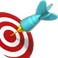
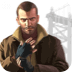
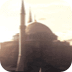
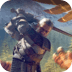

In [6]:
soup

In [36]:
soup.find_all('a',attrs={'class':"game-card-compact__heading game-card-compact__heading_with-link"})[0].text
#nome de 1 em 1

'The Witcher 2: Assassins of Kings Enhanced Edition'

In [15]:
soup.find_all('div',attrs={'class':"metascore-label metascore-label_green"})[0].text
# metacritic de 1 em 1

'88'

In [25]:
soup.find_all('div',attrs={'class':"game-card-about__desription"})[1].text
# release date começa no 1 e varia com i+4

'Apr 16, 2012'

In [27]:
soup.find_all('div',attrs={'class':"game-card-about__desription"})[2].text
# release date começa no 2 e varia com i+4

'RPG'

In [21]:
soup.find_all('div',attrs={'class':"truncate-block game-card__about-text"})[0].text
# Texto de 1 em 1

'The Witcher 2: Assassins of Kings Enhanced Edition is a RPG game developed by CD PROJEKT RED. It was originally released in 2012. CD PROJEKT RED published the game. The Witcher 2: Assassins of Kings Enhanced Edition has a Metascore of 88, based on professional reviews. The game is rated as "Recommended" on RAWG.\nYou can play The Witcher 2: Assassins of Kings Enhanced Edition on PC and Xbox 360. The game is sold via Steam, GOG and Xbox Store.\nJędrzej Mróz produced the game. It was directed by Adam Badowski. It was scored by Adam Skorupa, Krzysztof Wierzynkiewicz and Marcin Przybyłowicz.\n'

In [29]:
game_name=soup.find_all('a',attrs={'class':"game-card-compact__heading game-card-compact__heading_with-link"})[0].text
game_name=game_name.lower().replace(' ','+')
game_info=requests.get(f'https://api.rawg.io/api/games?key=f9ffc69c548c4547bdfe188c29fa4086&search={game_name}').json()

In [46]:
game_info['results'][0]['background_image']

'https://media.rawg.io/media/games/6cd/6cd653e0aaef5ff8bbd295bf4bcb12eb.jpg'

In [42]:
for i in range(1,13,4):
    print(i)

1
5
9


In [47]:
game_name='The Witcher 3'
game_name=game_name.lower().replace(' ','+')
requests.get(f'https://api.rawg.io/api/games?key=f9ffc69c548c4547bdfe188c29fa4086&search={game_name}').json()
slug=pd.json_normalize(requests.get(f'https://api.rawg.io/api/games?key=f9ffc69c548c4547bdfe188c29fa4086&search={game_name}').json())['results'][0][0]['slug']
soup=BeautifulSoup(requests.get(f'https://rawg.io/games/{slug}/suggestions').content)
game_name=[]
metacritic=[]
release=[]
genre=[]
description=[]
background_image=[]
for i in range(3):
    game_name.append(soup.find_all('a',attrs={'class':"game-card-compact__heading game-card-compact__heading_with-link"})[i].text)
    metacritic.append(soup.find_all('div',attrs={'class':"metascore-label metascore-label_green"})[i].text)
    description.append(soup.find_all('div',attrs={'class':"truncate-block game-card__about-text"})[i].text)
for i in range(1,13,4):
    release.append(soup.find_all('div',attrs={'class':"game-card-about__desription"})[i].text)
    genre.append(soup.find_all('div',attrs={'class':"game-card-about__desription"})[i+1].text)
for i in range(3):
    suggestion_name=game_name[i].lower().replace(' ','+')
    game_info=requests.get(f'https://api.rawg.io/api/games?key=f9ffc69c548c4547bdfe188c29fa4086&search={suggestion_name}').json()
    background_image.append(game_info['results'][0]['background_image'])

In [53]:
background_image

['https://media.rawg.io/media/games/6cd/6cd653e0aaef5ff8bbd295bf4bcb12eb.jpg',
 'https://media.rawg.io/media/games/071/0715f91a89d634d9183e2f23c0cb1a98.jpg',
 'https://media.rawg.io/media/games/0c3/0c3e6ab8e4cb7c579cbb3b4e26a60142.jpg']

In [56]:
for i in range(3):
    print(f'**Suggestion** {i+1}:\n')
    print('Name:\n')
    print(f"{game_name[i]}\n")
    #print(suggestions['background_image'][i],use_column_width=True)
    print('About:\n')
    print(f"{description[i]}")
    print('Genres:\n')
    print(f"{genre[i]}\n")
    print('Release date:\n')
    print(f"{release[i]}\n")
    print('Metacritic score:\n')
    print(f"{metacritic[i]}\n")

**Suggestion** 1:

Name:

The Witcher 2: Assassins of Kings Enhanced Edition

About:

The Witcher 2: Assassins of Kings Enhanced Edition is a RPG game developed by CD PROJEKT RED. It was originally released in 2012. CD PROJEKT RED published the game. The Witcher 2: Assassins of Kings Enhanced Edition has a Metascore of 88, based on professional reviews. The game is rated as "Recommended" on RAWG.
You can play The Witcher 2: Assassins of Kings Enhanced Edition on PC and Xbox 360. The game is sold via Steam, GOG and Xbox Store.
Jędrzej Mróz produced the game. It was directed by Adam Badowski. It was scored by Adam Skorupa, Krzysztof Wierzynkiewicz and Marcin Przybyłowicz.

Genres:

RPG

Release date:

Apr 16, 2012

Metacritic score:

88

**Suggestion** 2:

Name:

Fable Anniversary

About:

Fable Anniversary is a RPG game developed by Lionhead Studios. It was originally released in 2014. It was published by Microsoft Studios. On review aggregator Metacritic, Fable Anniversary has a score 

# Tratando os datasets gerados com web scrapping

In [197]:
df=pd.read_csv('psdeals+api_completo_v3.csv')

In [198]:
df.columns

Index(['Title', 'Original_price', 'Max_price', 'Min_price', 'Min_price_plus',
       'Publisher', 'Age_limit', 'merge_key', 'name', 'id', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags', 'original_names_psdeals', 'Promotional Price',
       'Psplus Price'],
      dtype='object')

In [199]:
df=df[['Title', 'Original_price', 'Promotional Price', 'Psplus Price','Max_price', 'Min_price', 'Min_price_plus', 'name', 'description', 'genres',
       'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags']]

In [200]:
mask=df.loc[:,'playtime'].isnull()
df.loc[mask,['name', 'description', 'genres',
       'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags']]='Without info'

In [201]:
genres=df.genres

In [202]:
list_genres=list(genres)

In [203]:
genres_aux=[]
for i in range(len(list_genres)):
    try:
        for j in range(len(eval(list_genres[i]))):
            genres_aux.append(eval(list_genres[i])[j])
    except:
        pass

In [204]:
set(genres_aux)

{'Action',
 'Adventure',
 'Arcade',
 'Board Games',
 'Card',
 'Casual',
 'Educational',
 'Family',
 'Fighting',
 'Indie',
 'Massively Multiplayer',
 'Platformer',
 'Puzzle',
 'RPG',
 'Racing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

Não há um número excessivo de gêneros, então, não será necessária uma segunda classificação

In [217]:
list_platforms=list(df['parent_platforms'])
platforms_aux=[]
for i in range(len(list_platforms)):
    try:
        for j in range(len(list_platforms[i])):
            platforms_aux.append(list_platforms[i][j])
    except:
        pass

In [218]:
set(platforms_aux)

{' ',
 '3DO',
 'Android',
 'Apple Macintosh',
 'Atari',
 'Linux',
 'Neo Geo',
 'Nintendo',
 'PC',
 'PlayStation',
 'SEGA',
 'W',
 'Web',
 'Xbox',
 'f',
 'h',
 'i',
 'iOS',
 'n',
 'o',
 't',
 'u'}

## Tratando as informações que vieram como lista

In [4]:
def treat_list(x):
    try:
        return eval(x)
    except:
        return 'Without info'

In [207]:
df.genres=df.genres.apply(treat_list)

In [208]:
df.developers=df.developers.apply(treat_list)

In [209]:
df.publishers=df.publishers.apply(treat_list)

In [216]:
df['parent_platforms']=df['parent_platforms'].apply(treat_list)

## Tratando as datas

In [210]:
import datetime

In [211]:
df.released

0        2020-05-26
1        2017-06-05
2        2020-09-29
3        2020-08-27
4      Without info
           ...     
967      2019-08-20
968      2017-05-16
969      2018-09-14
970      2016-08-23
971      2014-09-08
Name: released, Length: 972, dtype: object

In [212]:
df.released.loc[df.released!='Without info']=pd.to_datetime(df.released.loc[df.released!='Without info'])

In [213]:
df.released.loc[df.released!='Without info']=pd.to_datetime(df.released.loc[df.released!='Without info'],format="%d/%m/%Y")

In [32]:
def treat_date(x):
    try:
        return x.strftime("%d/%m/%Y")
    except:
        return 'Without info'

In [215]:
df.released=df.released.apply(treat_date)

## Função para checar se uma string está contida em alguma lista no dataframe

In [219]:
def check_if_in_list(x,word):
    try:
        if word in x:
            return True
        else:
            return False
    except:
            return False

In [220]:
df.loc[df['parent_platforms'].apply(check_if_in_list,word='Xbox'),['name','parent_platforms']]

,name,parent_platforms
0,Warface: Breakout,"[PlayStation, Xbox]"
3,Project CARS 3,"[PC, PlayStation, Xbox]"
5,Assetto Corsa Competizione,"[PC, PlayStation, Xbox]"
6,Resident Evil 3,"[PC, PlayStation, Xbox]"
7,Totally Reliable Delivery Service,"[PC, PlayStation, Xbox, iOS, Nintendo]"
...,...,...
961,Far Cry 5 Gold Edition,"[PC, PlayStation, Xbox]"
963,Blood Bowl 2,"[PC, PlayStation, Xbox, Apple Macintosh]"
964,Blood Bowl 2,"[PC, PlayStation, Xbox, Apple Macintosh]"
967,Remnant: From the Ashes,"[PC, PlayStation, Xbox]"


## Tratando as tags

In [222]:
df['tags']=df['tags'].apply(treat_list)

In [223]:
df.tags

0                                                     []
1      [Singleplayer, Steam Achievements, Atmospheric...
2           [Singleplayer, RPG, Co-op, Online Co-Op, VR]
3      [Singleplayer, Steam Achievements, Multiplayer...
4                                           Without info
                             ...                        
967    [Singleplayer, Full controller support, RPG, c...
968                      [exclusive, true exclusive, VR]
969    [Singleplayer, Steam Achievements, steam-tradi...
970    [Singleplayer, Steam Achievements, Multiplayer...
971    [Singleplayer, Steam Achievements, steam-tradi...
Name: tags, Length: 972, dtype: object

In [224]:
list_tags=list(df['tags'])
tags_aux=[]
for i in range(len(list_tags)):
    try:
        for j in range(len(list_tags[i])):
            tags_aux.append(list_tags[i][j])
    except:
        pass

In [225]:
import collections
sorted(collections.Counter(tags_aux).items(),key=lambda item: item[1],reverse=True)

[('Singleplayer', 639),
 ('Steam Achievements', 492),
 ('Full controller support', 409),
 ('Multiplayer', 353),
 ('Steam Cloud', 326),
 ('steam-trading-cards', 217),
 ('Co-op', 196),
 ('Atmospheric', 191),
 ('RPG', 191),
 ('cooperative', 160),
 ('i', 136),
 ('t', 136),
 ('o', 136),
 ('Open World', 134),
 ('Split Screen', 122),
 ('Great Soundtrack', 121),
 ('2D', 121),
 ('Partial Controller Support', 120),
 ('Online Co-Op', 118),
 ('Story Rich', 114),
 ('Gore', 114),
 ('Online multiplayer', 113),
 ('Violent', 112),
 ('Horror', 111),
 ('Third Person', 108),
 ('Steam Leaderboards', 108),
 ('online', 102),
 ('First-Person', 99),
 ('Local Multiplayer', 97),
 ('role-playing', 94),
 ('Anime', 94),
 ('Local Co-Op', 84),
 ('Sci-fi', 79),
 ('Funny', 79),
 ('Survival', 77),
 ('Fantasy', 77),
 ('Female Protagonist', 73),
 ('Exploration', 72),
 ('FPS', 68),
 ('W', 68),
 ('h', 68),
 ('u', 68),
 (' ', 68),
 ('n', 68),
 ('f', 68),
 ('Difficult', 63),
 ('Action-Adventure', 63),
 ('PvP', 60),
 ('VR', 56

## Criando colunas com informações extras

### Criando um indicador para jogos online

In [226]:
df['flag_online']=0

In [227]:
df.loc[df['tags'].apply(check_if_in_list,word='Online Co-Op'),'flag_online']=1

In [228]:
df.loc[df['tags'].apply(check_if_in_list,word='Online multiplayer'),'flag_online']=1

In [229]:
df.loc[df['tags'].apply(check_if_in_list,word='Online multiplayer'),'flag_online']=1

### Calculando as % de desconto dos jogos

In [230]:
df.loc[df.loc[:,'Psplus Price']=='Free','Psplus Price']='R$ 00,00'

In [237]:
df.loc[df.loc[:,'Original_price']=='Free','Original_price']='R$ 00,00'

In [238]:
df.loc[df.loc[:,'Promotional Price']=='Free','Promotional Price']='R$ 00,00'

In [233]:
df.loc[df.loc[:,'Min_price']=='Free','Min_price']='R$ 00,00'

In [240]:
df.loc[df.loc[:,'Min_price_plus']=='Free','Min_price_plus']='R$ 00,00'

In [234]:
df.loc[df.loc[:,'Max_price']=='Free','Max_price']='R$ 00,00'

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              972 non-null    object
 1   Original_price     972 non-null    object
 2   Promotional Price  972 non-null    object
 3   Psplus Price       972 non-null    object
 4   Max_price          972 non-null    object
 5   Min_price          972 non-null    object
 6   Min_price_plus     972 non-null    object
 7   name               972 non-null    object
 8   description        968 non-null    object
 9   genres             972 non-null    object
 10  developers         972 non-null    object
 11  publishers         972 non-null    object
 12  released           972 non-null    object
 13  esrb_rating.name   972 non-null    object
 14  parent_platforms   972 non-null    object
 15  playtime           972 non-null    object
 16  metacritic         972 non-null    object
 1

In [241]:
df

,Title,Original_price,Promotional Price,Psplus Price,Max_price,Min_price,Min_price_plus,name,description,genres,...,rating_top,ratings_count,reddit_count,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags,flag_online
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98","R$ 104,90","R$ 20,98","R$ 20,98",Warface: Breakout,<p>Warface: Breakout brings the tactical FPS e...,"[Shooter, Massively Multiplayer]",...,3,5,1193,5,346,0,0,warface-breakout,[],0
1,Die Young,"R$ 97,50","R$ 73,12","R$ 68,24","R$ 97,50","R$ 73,12","R$ 68,24",Die Young,Kidnapped for no clear reason to a dazzling ye...,"[Action, Adventure, Simulation, Indie]",...,4,6,0,7,267,102,1e+06,die-young,"[Singleplayer, Steam Achievements, Atmospheric...",0
2,The Walking Dead Onslaught,"R$ 149,50","R$ 89,70","R$ 89,70","R$ 149,50","R$ 89,70","R$ 89,70",The Walking Dead Onslaught,<p>STEP INTO AMC’S THE WALKING DEAD Fight your...,"[Action, Shooter, Adventure, RPG, Simulation, ...",...,0,0,0,0,263,0,0,the-walking-dead-onslaught,"[Singleplayer, RPG, Co-op, Online Co-Op, VR]",1
3,Project CARS 3,"R$ 249,90","R$ 99,96","R$ 99,96","R$ 249,90","R$ 99,96","R$ 99,96",Project CARS 3,<p>Get ready for Your Ultimate Driver Journey....,"[Simulation, Sports, Racing]",...,4,11,0,12,378,0,0,project-cars-3,"[Singleplayer, Steam Achievements, Multiplayer...",0
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 107,45","R$ 107,45","R$ 214,90","R$ 107,45","R$ 107,45",Without info,Without info,Without info,...,Without info,Without info,Without info,Without info,Without info,Without info,Without info,Without info,Without info,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Remnant: From the Ashes,"R$ 164,90","R$ 164,90","R$ 00,00","R$ 164,90","R$ 82,45","R$ 00,00",Remnant: From the Ashes,<p>Remnant: From the Ashes is a third-person s...,"[Action, Adventure, RPG]",...,4,287,0,298,608,102,147565,remnant-from-the-ashes,"[Singleplayer, Full controller support, RPG, c...",1
968,Farpoint,"R$ 79,90","R$ 79,90","R$ 00,00","R$ 79,90","R$ 39,95","R$ 00,00",Farpoint,<p>Farpoint is a riveting VR space adventure s...,[Shooter],...,4,75,0,76,392,105,140188,farpoint,"[exclusive, true exclusive, VR]",0
969,Shadow of the Tomb Raider,"R$ 00,00","R$ 00,00","R$ 00,00","R$ 00,00","R$ 00,00","R$ 00,00",Shadow of the Tomb Raider,<p>Experience Lara Croft’s defining moment as ...,"[Action, Adventure]",...,4,1007,0,1020,656,101,1e+06,shadow-of-the-tomb-raider,"[Singleplayer, Steam Achievements, steam-tradi...",0
970,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 209,90","R$ 73,46","R$ 73,46","R$ 209,90","R$ 69,26","R$ 48,27",The King of Fighters XIV,<p>The world-famous “KOF” VS Fighting Game ser...,"[Action, Fighting]",...,4,41,0,41,616,101,579279,the-king-of-fighters-xiv,"[Singleplayer, Steam Achievements, Multiplayer...",1


In [242]:
df['% discount']=(1-df['Promotional Price'].apply(lambda x: float(x[3:].replace(',','.')))/df['Original_price'].apply(lambda x: float(x[3:].replace(',','.'))))

In [243]:
df['% discount plus']=(1-df['Psplus Price'].apply(lambda x: float(x[3:].replace(',','.')))/df['Original_price'].apply(lambda x: float(x[3:].replace(',','.'))))

In [248]:
df

,Title,Original_price,Promotional Price,Psplus Price,Max_price,Min_price,Min_price_plus,name,description,genres,...,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags,flag_online,% discount,% discount plus,Days_released
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98","R$ 104,90","R$ 20,98","R$ 20,98",Warface: Breakout,<p>Warface: Breakout brings the tactical FPS e...,"[Shooter, Massively Multiplayer]",...,5,346,0,0,warface-breakout,[],0,0.800000,0.800000,320
1,Die Young,"R$ 97,50","R$ 73,12","R$ 68,24","R$ 97,50","R$ 73,12","R$ 68,24",Die Young,Kidnapped for no clear reason to a dazzling ye...,"[Action, Adventure, Simulation, Indie]",...,7,267,102,1e+06,die-young,"[Singleplayer, Steam Achievements, Atmospheric...",0,0.250051,0.300103,1406
2,The Walking Dead Onslaught,"R$ 149,50","R$ 89,70","R$ 89,70","R$ 149,50","R$ 89,70","R$ 89,70",The Walking Dead Onslaught,<p>STEP INTO AMC’S THE WALKING DEAD Fight your...,"[Action, Shooter, Adventure, RPG, Simulation, ...",...,0,263,0,0,the-walking-dead-onslaught,"[Singleplayer, RPG, Co-op, Online Co-Op, VR]",1,0.400000,0.400000,194
3,Project CARS 3,"R$ 249,90","R$ 99,96","R$ 99,96","R$ 249,90","R$ 99,96","R$ 99,96",Project CARS 3,<p>Get ready for Your Ultimate Driver Journey....,"[Simulation, Sports, Racing]",...,12,378,0,0,project-cars-3,"[Singleplayer, Steam Achievements, Multiplayer...",0,0.600000,0.600000,227
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 107,45","R$ 107,45","R$ 214,90","R$ 107,45","R$ 107,45",Without info,Without info,Without info,...,Without info,Without info,Without info,Without info,Without info,Without info,0,0.500000,0.500000,Without info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Remnant: From the Ashes,"R$ 164,90","R$ 164,90","R$ 00,00","R$ 164,90","R$ 82,45","R$ 00,00",Remnant: From the Ashes,<p>Remnant: From the Ashes is a third-person s...,"[Action, Adventure, RPG]",...,298,608,102,147565,remnant-from-the-ashes,"[Singleplayer, Full controller support, RPG, c...",1,0.000000,1.000000,600
968,Farpoint,"R$ 79,90","R$ 79,90","R$ 00,00","R$ 79,90","R$ 39,95","R$ 00,00",Farpoint,<p>Farpoint is a riveting VR space adventure s...,[Shooter],...,76,392,105,140188,farpoint,"[exclusive, true exclusive, VR]",0,0.000000,1.000000,1426
969,Shadow of the Tomb Raider,"R$ 00,00","R$ 00,00","R$ 00,00","R$ 00,00","R$ 00,00","R$ 00,00",Shadow of the Tomb Raider,<p>Experience Lara Croft’s defining moment as ...,"[Action, Adventure]",...,1020,656,101,1e+06,shadow-of-the-tomb-raider,"[Singleplayer, Steam Achievements, steam-tradi...",0,NaN,NaN,940
970,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 209,90","R$ 73,46","R$ 73,46","R$ 209,90","R$ 69,26","R$ 48,27",The King of Fighters XIV,<p>The world-famous “KOF” VS Fighting Game ser...,"[Action, Fighting]",...,41,616,101,579279,the-king-of-fighters-xiv,"[Singleplayer, Steam Achievements, Multiplayer...",1,0.650024,0.650024,1692


In [249]:
df['% max discount']=(1-df['Min_price'].apply(lambda x: float(x[3:].replace(',','.')))/df['Original_price'].apply(lambda x: float(x[3:].replace(',','.'))))

In [250]:
df['max_price/original_price']=(1-df['Max_price'].apply(lambda x: float(x[3:].replace(',','.')))/df['Original_price'].apply(lambda x: float(x[3:].replace(',','.'))))

In [251]:
df['Original_price']=df['Original_price'].apply(lambda x: x[3:].replace(',','.'))

In [252]:
df['Promotional Price']=df['Promotional Price'].apply(lambda x: x[3:].replace(',','.'))

In [253]:
df['Psplus Price']=df['Psplus Price'].apply(lambda x: x[3:].replace(',','.'))

In [254]:
df['Max_price']=df['Max_price'].apply(lambda x: x[3:].replace(',','.'))

In [255]:
df['Min_price']=df['Min_price'].apply(lambda x: x[3:].replace(',','.'))

In [256]:
df['Min_price_plus']=df['Min_price_plus'].apply(lambda x: x[3:].replace(',','.'))

### Criando a variável de tempo desde o lançamento do jogo

In [244]:
from datetime import datetime
from datetime import date

In [245]:
date_today=date.today().strftime("%d/%m/%Y")

In [246]:
def GetDaysReleased(x,date_today):
    try:
        return (datetime.strptime(date_today,'%d/%m/%Y')-datetime.strptime(x,'%d/%m/%Y')).days
    except:
        return 'Without info'

In [247]:
df['Days_released']=df.released.apply(GetDaysReleased,date_today=date_today)

In [258]:
df.to_csv('game_info_completo_para_tableau.csv',index=False)

# Checagem das variáveis correlacionadas

In [294]:
df=pd.read_csv('game_info_completo_para_tableau.csv')

In [11]:
df.loc[df.loc[:,'name']=="Without info",['name', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags']]=0

In [12]:
df.loc[df.loc[:,'Days_released']=="Without info",'Days_released']=0

In [13]:
df.loc[df.loc[:,'metacritic']=="Without info",'metacritic']=0

In [298]:
df_corr=df.apply(pd.to_numeric, errors='ignore')

In [300]:
df_corr.corr()

,Original_price,Promotional Price,Psplus Price,Max_price,Min_price,Min_price_plus,playtime,metacritic,game_series_count,rating,...,reviews_count,suggestions_count,twitch_count,youtube_count,flag_online,% discount,% discount plus,Days_released,% max discount,max_price/original_price
Original_price,1.000000,0.764690,0.770456,0.986721,0.744347,0.742322,0.105660,0.171563,0.079617,0.046469,...,0.021847,0.058146,0.066719,0.063181,0.129777,-0.002622,-0.018055,-0.213823,-0.025297,0.039886
Promotional Price,0.764690,1.000000,0.963771,0.760308,0.957938,0.938796,0.057882,0.114630,0.016865,-0.003943,...,-0.009336,-0.016696,-0.014593,-0.043354,0.051294,-0.537277,-0.507304,-0.262922,-0.505055,0.009732
Psplus Price,0.770456,0.963771,1.000000,0.767499,0.970499,0.971338,0.067027,0.108965,0.023729,-0.011629,...,-0.007076,-0.023610,-0.025818,-0.044358,0.051586,-0.485921,-0.545336,-0.255921,-0.504828,0.004117
Max_price,0.986721,0.760308,0.767499,1.000000,0.737690,0.736040,0.106227,0.182271,0.079212,0.063279,...,0.025748,0.057807,0.082680,0.073203,0.141875,-0.010635,-0.028712,-0.217010,-0.026449,-0.109014
Min_price,0.744347,0.957938,0.970499,0.737690,1.000000,0.987634,0.051118,0.106382,0.001348,-0.031112,...,-0.016877,-0.025988,-0.058958,-0.056527,0.040016,-0.498795,-0.519668,-0.276442,-0.571319,0.025079
Min_price_plus,0.742322,0.938796,0.971338,0.736040,0.987634,1.000000,0.051328,0.102957,0.001844,-0.035591,...,-0.018429,-0.033949,-0.068618,-0.061907,0.035013,-0.469630,-0.522407,-0.264833,-0.551755,0.023421
playtime,0.105660,0.057882,0.067027,0.106227,0.051118,0.051328,1.000000,0.312215,0.204833,0.316952,...,0.537437,0.310332,0.320455,0.361405,0.147759,0.028208,0.009711,0.106905,0.035878,0.003502
metacritic,0.171563,0.114630,0.108965,0.182271,0.106382,0.102957,0.312215,1.000000,0.270658,0.598544,...,0.457612,0.414200,0.515519,0.489308,0.201198,0.042964,0.053269,0.156805,0.054301,-0.084914
game_series_count,0.079617,0.016865,0.023729,0.079212,0.001348,0.001844,0.204833,0.270658,1.000000,0.272063,...,0.339577,0.283815,0.261380,0.434560,0.154103,0.061305,0.042731,0.283079,0.071415,-0.022662
rating,0.046469,-0.003943,-0.011629,0.063279,-0.031112,-0.035591,0.316952,0.598544,0.272063,1.000000,...,0.399976,0.433683,0.622329,0.533031,0.208079,0.068457,0.081096,0.392788,0.127716,-0.096467


## Explodindo a coluna de gênero para verificar correlações específicas de cada gênero

In [3]:
df=pd.read_csv('game_info_completo_para_tableau.csv')

In [20]:
df.genres=df.genres.apply(treat_list)

In [22]:
df.publishers=df.publishers.apply(treat_list)

In [7]:
genres_exploded=pd.get_dummies(df['genres'].explode()).sum(level=0)

In [27]:
list_pubs=list(df['publishers'])
pubs_aux=[]
for i in range(len(list_pubs)):
    try:
        for j in range(len(list_pubs[i])):
            pubs_aux.append(list_pubs[i][j])
    except:
        pass

In [28]:
import collections
sorted(collections.Counter(pubs_aux).items(),key=lambda item: item[1],reverse=True)

[('i', 136),
 ('t', 136),
 ('o', 136),
 ('W', 68),
 ('h', 68),
 ('u', 68),
 (' ', 68),
 ('n', 68),
 ('f', 68),
 ('Bandai Namco Entertainment', 43),
 ('Bigben Interactive', 32),
 ('Ratalaika Games', 28),
 ('Electronic Arts', 26),
 ('Ubisoft Entertainment', 25),
 ('Capcom', 24),
 ('THQ Nordic', 24),
 ('NIS America', 23),
 ('BANDAI NAMCO Entertainment US', 17),
 ('Team17 Digital', 17),
 ('Focus Home Interactive', 16),
 ('Sony Computer Entertainment', 16),
 ('Deep Silver', 16),
 ('Square Enix', 16),
 ('505 Games', 14),
 ('Bethesda Softworks', 14),
 ('Kalypso Media', 14),
 ('Warner Bros. Interactive', 14),
 ('Sony Interactive Entertainment', 13),
 ('PQube', 13),
 ('Spike Chunsoft Co', 13),
 ('Modus Games', 12),
 ('Milestone', 12),
 ('Activision Blizzard', 11),
 ('Merge Games', 11),
 ('SEGA', 10),
 ('KEMCO', 10),
 ('SNK', 10),
 ('Koch Media', 9),
 ('Maximum Games', 9),
 ('Feral Interactive', 9),
 ('Daedalic Entertainment', 9),
 ('Nacon', 9),
 ('tinyBuild', 8),
 ('GameMill Entertainment', 8),

In [39]:
df_genres = df.merge(genres_exploded, left_index=True, right_index=True)

In [31]:
df_genres.to_csv('game_info_completo_genero_explodido.csv')

In [41]:
df_genres.loc[df_genres.loc[:,'name']=="Without info",['name', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags']]=0

In [43]:
df_genres.loc[df.loc[:,'Days_released']=="Without info",'Days_released']=0

In [44]:
df_genres.loc[df.loc[:,'metacritic']=="Without info",'metacritic']=0

In [46]:
df_genres_corr=df_genres.apply(pd.to_numeric, errors='ignore')

In [52]:
df_genres_corr.corr()['Max_price']

Original_price              0.986721
Promotional Price           0.760308
Psplus Price                0.767499
Max_price                   1.000000
Min_price                   0.737690
Min_price_plus              0.736040
playtime                    0.106227
metacritic                  0.182271
game_series_count           0.079212
rating                      0.063279
rating_top                  0.039899
ratings_count               0.024491
reddit_count                0.152731
reviews_count               0.025748
suggestions_count           0.057807
twitch_count                0.082680
youtube_count               0.073203
flag_online                 0.141875
% discount                 -0.010635
% discount plus            -0.028712
Days_released              -0.217010
% max discount             -0.026449
max_price/original_price   -0.109014
Action                     -0.067113
Adventure                  -0.120317
Arcade                     -0.154493
Board Games                -0.052436
C

Com essa análise, chega-se a conclusão que o tempo desde o lançamento e a nota do metacritic são as variáveis que mais influenciam no preço/nas promoções.
Também nota-se que o único gênero que destoa do resto na correlação é o "Indie"

# Gráficos para auxiliar na visualização de tendências

In [3]:
df=pd.read_csv('game_info_completo_genero_explodido_para_tableau.csv')

In [4]:
df.loc[df.loc[:,'name']=="Without info",['name', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags']]=0

df.loc[df.loc[:,'Days_released']=="Without info",'Days_released']=0

df.loc[df.loc[:,'metacritic']=="Without info",'metacritic']=0

In [5]:
df=df.apply(pd.to_numeric, errors='ignore')

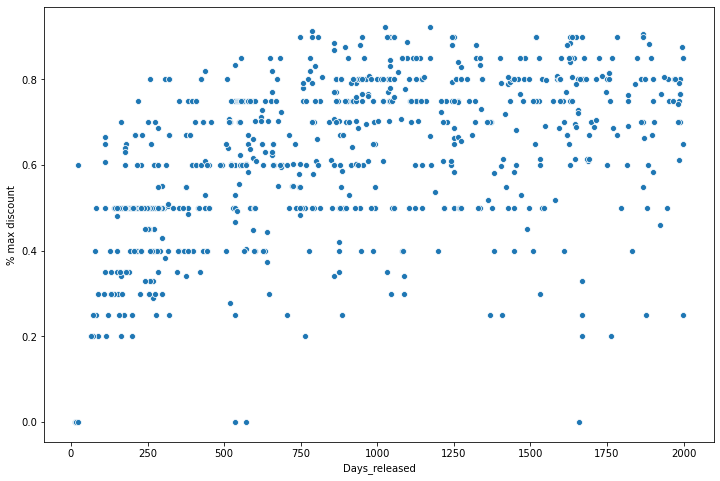

In [7]:
mask=(df.loc[:,'Days_released']>0.01) & (df.loc[:,'Days_released']<2000) 
plt.figure(figsize=(12,8))
sns.scatterplot(df.loc[mask,'Days_released'],df.loc[mask,'% max discount'])

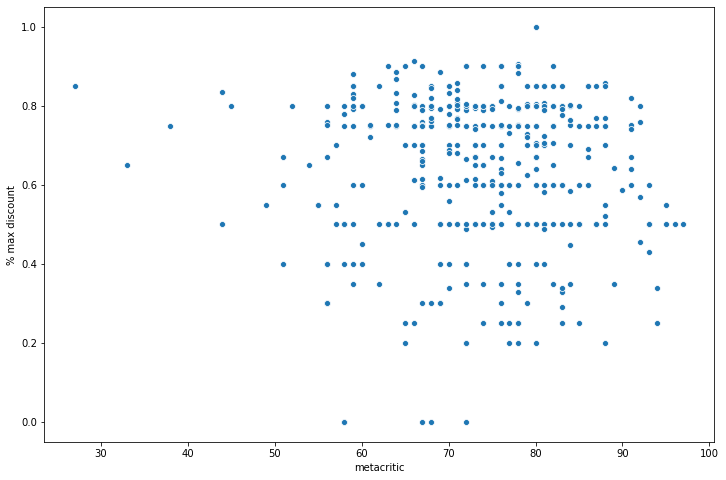

In [9]:
mask=df.loc[:,'metacritic']>0
plt.figure(figsize=(12,8))
sns.scatterplot(df.loc[mask,'metacritic'],df.loc[mask,'% max discount'])

# Trabalhando com histórico de preços

## Incluindo no histórico jogos que não foram capturados num primeiro momento

In [69]:
price_historic=pd.read_csv('df_price_historic_31.04.csv')

In [74]:
df=pd.read_csv('psdeals_database_31.04.csv')

In [75]:
price_historic['Title'].unique()

array(['Warface: Breakout', 'Die Young', 'The Walking Dead Onslaught',
       'Project CARS 3',
       'Commandos 2 and Praetorians: HD Remaster Double Pack',
       'Assetto Corsa Competizione', 'RESIDENT EVIL 3',
       'Totally Reliable Delivery Service',
       'Totally Reliable Delivery Service Deluxe Edition',
       'The Pillar: Puzzle Escape', 'Moons of Madness',
       'Persona®5 Royal Deluxe Edition',
       'eFootball PES 2021 SEASON UPDATE STANDARD EDITION',
       'Through the Darkest of Times', 'Demon’s Tier+',
       'ONE PIECE: PIRATE WARRIORS 4 Edição Deluxe',
       'Predator: Hunting Grounds Digital Deluxe Edition',
       'FAIRY TAIL Digital Deluxe', 'JankBrain',
       'Ghost of Tsushima Digital Deluxe Edition',
       'Ary and the Secret of Seasons', 'Biped',
       'Don’t Starve Mega Pack 2020', 'OhShape',
       'World War Z - GOTY Edition', 'DOOM Eternal Edição Padrão',
       'Book of Demons', 'Disintegration',
       'Arizona Sunshine® - Deluxe Edition',
    

In [76]:
df['Title'].unique()

array(['Warface: Breakout', 'Die Young', 'The Walking Dead Onslaught',
       'Project CARS 3',
       'Commandos 2 and Praetorians: HD Remaster Double Pack',
       'Assetto Corsa Competizione', 'RESIDENT EVIL 3',
       'Totally Reliable Delivery Service',
       'Totally Reliable Delivery Service Deluxe Edition',
       'The Pillar: Puzzle Escape', 'Moons of Madness',
       'Persona®5 Royal Deluxe Edition',
       'eFootball PES 2021 SEASON UPDATE STANDARD EDITION',
       'Through the Darkest of Times', 'Demon’s Tier+',
       'ONE PIECE: PIRATE WARRIORS 4 Edição Deluxe',
       'Predator: Hunting Grounds Digital Deluxe Edition',
       'FAIRY TAIL Digital Deluxe', 'JankBrain',
       'Ghost of Tsushima Digital Deluxe Edition',
       'Ary and the Secret of Seasons', 'Biped',
       'Don’t Starve Mega Pack 2020', 'OhShape',
       'World War Z - GOTY Edition', 'DOOM Eternal Edição Padrão',
       'Book of Demons', 'Disintegration',
       'Arizona Sunshine® - Deluxe Edition',
    

In [78]:
# pegar históricos desses jogos
missing_games=list(set(df['Title'].unique()) -set(price_historic['Title'].unique()))

In [80]:
missing_games[0]

'Just Cause 4: Reloaded'

In [99]:
missing_games_url=[]
for i in range(len(missing_games)):
    missing_games_url.append(df.loc[df['Title']==missing_games[i],'url_games'].values[0])

In [100]:
missing_games_url

['/ps4-store-br/just-cause-4-reloaded-game-38412/',
 '/ps4-store-br/reel-fishing-road-trip-adventure-game-38614/',
 '/ps4-store-br/need-for-speed-heat-edicao-deluxe-game-38407/',
 '/ps4-store-br/ghostbusters-the-video-game-remastered-game-38541/',
 '/ps4-store-br/wwe-2k20-deluxe-edition-game-38481/',
 '/ps4-store-br/indivisible-game-38530/',
 '/ps4-store-br/medievil-digital-deluxe-game-38459/',
 '/ps4-store-br/the-alliance-alive-hd-remastered-game-38534/',
 '/ps4-store-br/distraint-deluxe-edition-game-38618/',
 '/ps4-store-br/bee-simulator-game-38393/',
 '/ps4-store-br/fractured-minds-game-38384/',
 '/ps4-store-br/niffelheim-game-38576/',
 '/ps4-store-br/wands-game-38511/',
 '/ps4-store-br/yu-no-a-girl-who-chants-love-at-the-bound-of-this-world-game-38559/',
 '/ps4-store-br/medievil-game-38458/',
 '/ps4-store-br/scheming-through-the-zombie-apocalypse-the-beginning-game-38597/',
 '/ps4-store-br/tropico-6-game-38564/',
 '/ps4-store-br/football-game-game-38420/',
 '/ps4-store-br/cat-quest

In [102]:
title, max_price, min_price_promotional, min_price_plus, publisher, age_limit,\
    games_price_historic, games_price_historic_plus=GetHistoricalData(missing_games_url,0,len(missing_games_url))

Game 0
Game 1
Game 2
Game 3
Game 4
Game 5
Game 6
Game 7
Game 8
Game 9
Game 10
Game 11
Game 12
Game 13
Game 14
Game 15
Game 16
Game 17
Game 18
Game 19
Game 20
Game 21
Game 22
Game 23
Game 24
Game 25


In [115]:
compiled_price_historic=[]
for i in range(len(games_price_historic)):
    aux=games_price_historic[i]
    aux['Title']=title[i]
    compiled_price_historic.append(aux)

df_price_historic=pd.concat(compiled_price_historic,ignore_index=True)

In [116]:
compiled_price_historic=[]
for i in range(len(games_price_historic_plus)):
    aux=games_price_historic_plus[i]
    aux['Title']=title[i]
    compiled_price_historic.append(aux)

df_price_historic_plus=pd.concat(compiled_price_historic,ignore_index=True)

In [117]:
price_historic=pd.read_csv('df_price_historic_31.04.csv')

In [118]:
price_historic

,Time,Price,Title
0,2020-05-26 14:20:00,83.50,Warface: Breakout
1,2020-07-22 06:20:00,66.80,Warface: Breakout
2,2020-08-20 06:20:00,83.50,Warface: Breakout
3,2020-09-27 02:20:00,104.90,Warface: Breakout
4,2020-10-30 07:00:00,52.45,Warface: Breakout
...,...,...,...
10747,2020-12-22 08:20:01,73.46,THE KING OF FIGHTERS XIV Special Anniversary E...
10748,2021-04-01 20:51:16,73.46,THE KING OF FIGHTERS XIV Special Anniversary E...
10749,2020-04-14 15:11:46,51.90,Velocibox
10750,2020-09-26 22:20:00,66.90,Velocibox


In [119]:
df_price_historic

,Time,Price,Title
0,2020-04-14 15:11:46,57.71,Just Cause 4: Reloaded
1,2020-04-29 14:20:00,164.90,Just Cause 4: Reloaded
2,2020-05-13 06:20:00,41.22,Just Cause 4: Reloaded
3,2020-05-21 06:20:00,164.90,Just Cause 4: Reloaded
4,2020-07-22 06:20:00,57.71,Just Cause 4: Reloaded
...,...,...,...
343,2021-02-24 07:00:00,16.17,Vosaria: Lair of the Forgotten
344,2021-03-11 05:20:00,53.90,Vosaria: Lair of the Forgotten
345,2021-03-17 06:40:00,16.17,Vosaria: Lair of the Forgotten
346,2021-04-01 05:40:00,53.90,Vosaria: Lair of the Forgotten


In [120]:
price_historic=pd.concat([price_historic,df_price_historic])

In [122]:
price_historic.to_csv('df_price_historic_31.04_v2.csv',index=False)

In [113]:
price_historic_plus=pd.read_csv('df_price_historic_plus_31.04.csv')

In [123]:
price_historic_plus=pd.concat([price_historic_plus,df_price_historic_plus])

In [125]:
price_historic_plus.to_csv('df_price_historic_plus_31.04_v2.csv',index=False)

## Explorando a incluindo informações

In [105]:
price_historic=pd.read_csv('df_price_historic_31.04_v2.csv')

df=pd.read_csv('game_info_completo_para_tableau_v2.csv')

In [106]:
historic_df = price_historic.merge(df, left_on='Title', right_on='Title')

In [107]:
historic_df.columns

Index(['Time', 'Price', 'Title', 'Original_price', 'Promotional Price',
       'Psplus Price', 'Max_price', 'Min_price', 'Min_price_plus', 'name',
       'description', 'genres', 'developers', 'publishers', 'released',
       'esrb_rating.name', 'parent_platforms', 'playtime', 'metacritic',
       'game_series_count', 'rating', 'rating_top', 'ratings_count',
       'reddit_count', 'reviews_count', 'suggestions_count', 'twitch_count',
       'youtube_count', 'slug', 'tags', 'flag_online', '% discount',
       '% discount plus', 'Days_released', '% max discount',
       'max_price/original_price', 'genres_list'],
      dtype='object')

In [108]:
historic_df =historic_df[['Time', 'Price', 'Title','Max_price','released']]

In [109]:
historic_df['Time_formated']=historic_df['Time']

In [110]:
historic_df[0:10]

,Time,Price,Title,Max_price,released,Time_formated
0,2020-05-26 14:20:00,83.50,Warface: Breakout,104.9,26/05/2020,2020-05-26 14:20:00
1,2020-07-22 06:20:00,66.80,Warface: Breakout,104.9,26/05/2020,2020-07-22 06:20:00
2,2020-08-20 06:20:00,83.50,Warface: Breakout,104.9,26/05/2020,2020-08-20 06:20:00
3,2020-09-27 02:20:00,104.90,Warface: Breakout,104.9,26/05/2020,2020-09-27 02:20:00
4,2020-10-30 07:00:00,52.45,Warface: Breakout,104.9,26/05/2020,2020-10-30 07:00:00
5,2020-11-21 13:40:00,104.90,Warface: Breakout,104.9,26/05/2020,2020-11-21 13:40:00
6,2021-02-03 08:40:00,20.98,Warface: Breakout,104.9,26/05/2020,2021-02-03 08:40:00
7,2021-02-18 07:00:00,104.90,Warface: Breakout,104.9,26/05/2020,2021-02-18 07:00:00
8,2021-03-31 09:20:00,20.98,Warface: Breakout,104.9,26/05/2020,2021-03-31 09:20:00
9,2021-04-01 20:32:35,20.98,Warface: Breakout,104.9,26/05/2020,2021-04-01 20:32:35


In [111]:
historic_df['Time'][0]

'2020-05-26 14:20:00'

In [112]:
historic_df['Time']=pd.to_datetime(historic_df['Time'])

In [113]:
historic_df['Time']=historic_df['Time'].apply(treat_date)

In [114]:
historic_df['% Discount']=1-(historic_df['Price']/historic_df['Max_price'])

In [115]:
historic_df[0:10]

,Time,Price,Title,Max_price,released,Time_formated,% Discount
0,26/05/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-05-26 14:20:00,0.204004
1,22/07/2020,66.80,Warface: Breakout,104.9,26/05/2020,2020-07-22 06:20:00,0.363203
2,20/08/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-08-20 06:20:00,0.204004
3,27/09/2020,104.90,Warface: Breakout,104.9,26/05/2020,2020-09-27 02:20:00,0.000000
4,30/10/2020,52.45,Warface: Breakout,104.9,26/05/2020,2020-10-30 07:00:00,0.500000
5,21/11/2020,104.90,Warface: Breakout,104.9,26/05/2020,2020-11-21 13:40:00,0.000000
6,03/02/2021,20.98,Warface: Breakout,104.9,26/05/2020,2021-02-03 08:40:00,0.800000
7,18/02/2021,104.90,Warface: Breakout,104.9,26/05/2020,2021-02-18 07:00:00,0.000000
8,31/03/2021,20.98,Warface: Breakout,104.9,26/05/2020,2021-03-31 09:20:00,0.800000
9,01/04/2021,20.98,Warface: Breakout,104.9,26/05/2020,2021-04-01 20:32:35,0.800000


In [116]:
historic_df['Time_formated']=pd.to_datetime(historic_df['Time_formated'])

In [117]:
historic_df['Days on price']=historic_df['Time_formated'].diff(periods=-1)

In [118]:
historic_df['Days on price']=historic_df['Days on price'].apply(lambda x: x.days)

In [119]:
historic_df[0:15]

,Time,Price,Title,Max_price,released,Time_formated,% Discount,Days on price
0,26/05/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-05-26 14:20:00,0.204004,-57.0
1,22/07/2020,66.80,Warface: Breakout,104.9,26/05/2020,2020-07-22 06:20:00,0.363203,-29.0
2,20/08/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-08-20 06:20:00,0.204004,-38.0
3,27/09/2020,104.90,Warface: Breakout,104.9,26/05/2020,2020-09-27 02:20:00,0.000000,-34.0
4,30/10/2020,52.45,Warface: Breakout,104.9,26/05/2020,2020-10-30 07:00:00,0.500000,-23.0
5,21/11/2020,104.90,Warface: Breakout,104.9,26/05/2020,2020-11-21 13:40:00,0.000000,-74.0
6,03/02/2021,20.98,Warface: Breakout,104.9,26/05/2020,2021-02-03 08:40:00,0.800000,-15.0
7,18/02/2021,104.90,Warface: Breakout,104.9,26/05/2020,2021-02-18 07:00:00,0.000000,-42.0
8,31/03/2021,20.98,Warface: Breakout,104.9,26/05/2020,2021-03-31 09:20:00,0.800000,-2.0
9,01/04/2021,20.98,Warface: Breakout,104.9,26/05/2020,2021-04-01 20:32:35,0.800000,22.0


In [120]:
historic_df.loc[historic_df['Days on price']>0,'Days on price']=np.NaN

In [121]:
historic_df.loc[historic_df['Days on price']<0,'Days on price']=historic_df.loc[historic_df['Days on price']<0,'Days on price']*-1

In [122]:
game_days=historic_df.loc[~(historic_df['Days on price'].isnull()),:].groupby(by='Title',as_index=False).sum()[['Title','Days on price']]

In [123]:
historic_df=historic_df.merge(game_days, left_on='Title', right_on='Title')

In [124]:
historic_df

,Time,Price,Title,Max_price,released,Time_formated,% Discount,Days on price_x,Days on price_y
0,26/05/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-05-26 14:20:00,0.204004,57.0,314.0
1,22/07/2020,66.80,Warface: Breakout,104.9,26/05/2020,2020-07-22 06:20:00,0.363203,29.0,314.0
2,20/08/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-08-20 06:20:00,0.204004,38.0,314.0
3,27/09/2020,104.90,Warface: Breakout,104.9,26/05/2020,2020-09-27 02:20:00,0.000000,34.0,314.0
4,30/10/2020,52.45,Warface: Breakout,104.9,26/05/2020,2020-10-30 07:00:00,0.500000,23.0,314.0
...,...,...,...,...,...,...,...,...,...
11095,24/02/2021,16.17,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-02-24 07:00:00,0.700000,15.0,371.0
11096,11/03/2021,53.90,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-03-11 05:20:00,0.000000,7.0,371.0
11097,17/03/2021,16.17,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-03-17 06:40:00,0.700000,15.0,371.0
11098,01/04/2021,53.90,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-04-01 05:40:00,0.000000,16.0,371.0


In [125]:
historic_df.columns=['Time', 'Price', 'Title', 'Max_price', 'released', 'Time_formated',
       '% Discount', 'Days on price', 'Days on price_sum']

In [126]:
historic_df['weights']=historic_df['Days on price']/historic_df['Days on price_sum']

In [127]:
time_on_sale=historic_df.loc[historic_df.loc[:,'% Discount']!=0,:].groupby(by='Title',as_index=False).sum()

In [130]:
time_on_sale

,Title,Price,Max_price,% Discount,Days on price,Days on price_sum,weights
0,.hack//G.U. Last Recode,331.82,1399.30,5.340070,114.0,2485.0,0.321127
1,112th Seed,76.39,134.50,2.160223,96.0,1255.0,0.382470
2,13 Sentinels: Aegis Rim,1329.54,2099.30,2.566722,94.0,1701.0,0.386831
3,2064: Read Only Memories,188.40,419.60,2.204004,183.0,1420.0,0.515493
4,2Dark,193.59,749.40,4.450040,79.0,2142.0,0.221289
...,...,...,...,...,...,...,...
955,eFootball PES 2021 SEASON UPDATE STANDARD EDITION,464.12,899.50,2.420122,56.0,1140.0,0.245614
956,pixelBOT EXTREME!,116.96,161.70,0.830056,85.0,729.0,0.349794
957,resident evil 4,479.92,1199.92,4.800320,113.0,2856.0,0.316527
958,theHunter: Call of the Wild,535.30,897.00,2.419398,220.0,2136.0,0.617978


In [131]:
time_on_sale.columns=['Title', 'Price', 'Max_price', '% Discount', 'Days on sale',
       'Days on price_sum', 'weights']

In [132]:
time_on_sale[['Title','Days on sale']]

,Title,Days on sale
0,.hack//G.U. Last Recode,114.0
1,112th Seed,96.0
2,13 Sentinels: Aegis Rim,94.0
3,2064: Read Only Memories,183.0
4,2Dark,79.0
...,...,...
955,eFootball PES 2021 SEASON UPDATE STANDARD EDITION,56.0
956,pixelBOT EXTREME!,85.0
957,resident evil 4,113.0
958,theHunter: Call of the Wild,220.0


In [133]:
historic_df=historic_df.merge(time_on_sale[['Title','Days on sale']],how='outer',left_on='Title', right_on='Title')

In [134]:
historic_df['only_sale_weights']=historic_df.loc[historic_df.loc[:,'% Discount']!=0,'Days on price']/historic_df.loc[historic_df.loc[:,'% Discount']!=0,'Days on sale']

In [136]:
historic_df['weighted % discount']=historic_df['only_sale_weights']*historic_df['% Discount']

In [137]:
historic_df

,Time,Price,Title,Max_price,released,Time_formated,% Discount,Days on price,Days on price_sum,weights,Days on sale,only_sale_weights,weighted % discount
0,26/05/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-05-26 14:20:00,0.204004,57.0,314.0,0.181529,164.0,0.347561,0.070904
1,22/07/2020,66.80,Warface: Breakout,104.9,26/05/2020,2020-07-22 06:20:00,0.363203,29.0,314.0,0.092357,164.0,0.176829,0.064225
2,20/08/2020,83.50,Warface: Breakout,104.9,26/05/2020,2020-08-20 06:20:00,0.204004,38.0,314.0,0.121019,164.0,0.231707,0.047269
3,27/09/2020,104.90,Warface: Breakout,104.9,26/05/2020,2020-09-27 02:20:00,0.000000,34.0,314.0,0.108280,164.0,NaN,NaN
4,30/10/2020,52.45,Warface: Breakout,104.9,26/05/2020,2020-10-30 07:00:00,0.500000,23.0,314.0,0.073248,164.0,0.140244,0.070122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,24/02/2021,16.17,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-02-24 07:00:00,0.700000,15.0,371.0,0.040431,220.0,0.068182,0.047727
11096,11/03/2021,53.90,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-03-11 05:20:00,0.000000,7.0,371.0,0.018868,220.0,NaN,NaN
11097,17/03/2021,16.17,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-03-17 06:40:00,0.700000,15.0,371.0,0.040431,220.0,0.068182,0.047727
11098,01/04/2021,53.90,Vosaria: Lair of the Forgotten,53.9,22/06/2018,2021-04-01 05:40:00,0.000000,16.0,371.0,0.043127,220.0,NaN,NaN


In [138]:
historic_df['weighted price']=historic_df['weights']*historic_df['Price']

In [139]:
weighted_df=historic_df.loc[~(historic_df['Days on price'].isnull()),:].groupby(by='Title',as_index=False).sum()

In [140]:
weighted_df

,Title,Price,Max_price,% Discount,Days on price,Days on price_sum,weights,Days on sale,only_sale_weights,weighted % discount,weighted price
0,.hack//G.U. Last Recode,1931.02,2998.50,5.340070,355.0,5325.0,1.0,1710.0,1.0,0.766325,150.707127
1,112th Seed,143.64,188.30,1.660223,251.0,1757.0,1.0,672.0,1.0,0.328892,23.516215
2,13 Sentinels: Aegis Rim,2649.10,3298.90,2.166722,243.0,2673.0,1.0,1034.0,1.0,0.302864,264.764527
3,2064: Read Only Memories,356.24,524.50,1.604004,355.0,1775.0,1.0,915.0,1.0,0.257184,90.992732
4,2Dark,1067.89,1623.70,4.450040,357.0,4641.0,1.0,1027.0,1.0,0.729122,104.747843
...,...,...,...,...,...,...,...,...,...,...,...
967,eFootball PES 2021 SEASON UPDATE STANDARD EDITION,1124.36,1439.20,1.750083,228.0,1824.0,1.0,448.0,1.0,0.408762,161.838465
968,pixelBOT EXTREME!,278.66,323.40,0.830056,243.0,1458.0,1.0,510.0,1.0,0.255565,49.081605
969,resident evil 4,1469.86,2099.86,4.200280,357.0,4998.0,1.0,1582.0,1.0,0.600040,121.502605
970,theHunter: Call of the Wild,1133.30,1495.00,2.419398,356.0,3560.0,1.0,2200.0,1.0,0.279280,123.697978


In [141]:
df=df.merge(weighted_df,how='outer',left_on='Title', right_on='Title')

In [142]:
df=df[['Title', 'Original_price', 'Promotional Price', 'Psplus Price',
       'Max_price_x', 'Min_price', 'Min_price_plus', 'name', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags', 'flag_online', '% discount', '% discount plus',
       'Days_released', '% max discount', 'max_price/original_price',
       'genres_list','weighted % discount',
       'weighted price']]

In [143]:
df.columns=['Title', 'Original_price', 'Promotional Price', 'Psplus Price',
       'Max_price', 'Min_price', 'Min_price_plus', 'name', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags', 'flag_online', '% discount', '% discount plus',
       'Days_released', '% max discount', 'max_price/original_price',
       'genres_list', 'weighted % discount', 'weighted price']

In [144]:
entering_sale=historic_df.loc[historic_df.loc[:,'% Discount']!=0,:].groupby(by='Title',as_index=False).count()[['Title','Time']]

In [145]:
entering_sale.columns=['Title','Number of sales']

In [146]:
time_on_sale=historic_df.loc[historic_df.loc[:,'% Discount']!=0,:].groupby(by='Title',as_index=False).sum()

In [147]:
entering_sale=entering_sale.merge(time_on_sale, left_on='Title', right_on='Title')

In [148]:
entering_sale=entering_sale[['Title', 'Number of sales','Days on price', 'weights']]

In [149]:
entering_sale=entering_sale.merge(historic_df[['Title','Days on price_sum']], left_on='Title', right_on='Title')

In [150]:
entering_sale=entering_sale.drop_duplicates(ignore_index=True)

In [151]:
df=df.merge(entering_sale, how='outer', left_on='Title', right_on='Title')

In [152]:
df.columns=['Title', 'Original_price', 'Promotional Price', 'Psplus Price',
       'Max_price', 'Min_price', 'Min_price_plus', 'name', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags', 'flag_online', '% discount', '% discount plus',
       'Days_released', '% max discount', 'max_price/original_price',
       'genres_list', 'weighted % discount', 'weighted price',
       'Number of sales', 'Days on sale', '% days on sale', 'Days of historic']

In [153]:
df

,Title,Original_price,Promotional Price,Psplus Price,Max_price,Min_price,Min_price_plus,name,description,genres,...,Days_released,% max discount,max_price/original_price,genres_list,weighted % discount,weighted price,Number of sales,Days on sale,% days on sale,Days of historic
0,Warface: Breakout,104.9,20.98,20.98,104.9,20.98,20.98,Warface: Breakout,<p>Warface: Breakout brings the tactical FPS e...,"['Shooter', 'Massively Multiplayer']",...,320,0.800000,0.0,Action,0.335447,86.521369,7.0,164.0,0.522293,314.0
1,Die Young,97.5,73.12,68.24,97.5,73.12,68.24,Die Young,Kidnapped for no clear reason to a dazzling ye...,"['Action', 'Adventure', 'Simulation', 'Indie']",...,1406,0.250051,0.0,Adventure,0.250051,95.468333,2.0,2.0,0.083333,24.0
2,The Walking Dead Onslaught,149.5,89.70,89.70,149.5,89.70,89.70,The Walking Dead Onslaught,<p>STEP INTO AMC’S THE WALKING DEAD Fight your...,"['Action', 'Shooter', 'Adventure', 'RPG', 'Sim...",...,194,0.400000,0.0,Arcade,0.306696,134.880821,5.0,66.0,0.318841,207.0
3,Project CARS 3,249.9,99.96,99.96,249.9,99.96,99.96,Project CARS 3,<p>Get ready for Your Ultimate Driver Journey....,"['Simulation', 'Sports', 'Racing']",...,227,0.600000,0.0,Board Games,0.350008,232.406612,6.0,49.0,0.200000,245.0
4,Commandos 2 and Praetorians: HD Remaster Doubl...,214.9,107.45,107.45,214.9,107.45,107.45,Without info,Without info,Without info,...,Without info,0.500000,0.0,Card,0.456254,187.664141,5.0,55.0,0.277778,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Remnant: From the Ashes,164.9,164.90,0.00,164.9,82.45,0.00,Remnant: From the Ashes,<p>Remnant: From the Ashes is a third-person s...,"['Action', 'Adventure', 'RPG']",...,600,0.500000,0.0,NaN,0.438947,145.584466,5.0,95.0,0.266854,356.0
968,Farpoint,79.9,79.90,0.00,79.9,39.95,0.00,Farpoint,<p>Farpoint is a riveting VR space adventure s...,['Shooter'],...,1426,0.500000,0.0,NaN,0.463551,69.940280,6.0,96.0,0.268908,357.0
969,Shadow of the Tomb Raider,0.0,0.00,0.00,0.0,0.00,0.00,Shadow of the Tomb Raider,<p>Experience Lara Croft’s defining moment as ...,"['Action', 'Adventure']",...,940,NaN,NaN,NaN,0.000000,0.000000,2.0,87.0,1.000000,87.0
970,THE KING OF FIGHTERS XIV Special Anniversary E...,209.9,73.46,73.46,209.9,69.26,48.27,The King of Fighters XIV,<p>The world-famous “KOF” VS Fighting Game ser...,"['Action', 'Fighting']",...,1692,0.670033,0.0,NaN,0.635813,141.297022,7.0,183.0,0.514045,356.0


In [154]:
df.to_csv('game_info_completo_para_tableau_v3.csv',index=False)

# Consertando release date

Após trabalhar com os dados, foi notado que para alguns poucos títulos o tratamento fuzzy de strings não funcionou muito bom, por isso, essa seção visa corrigir isso

In [155]:
df=pd.read_csv('game_info_completo_para_tableau_v3.csv')

In [156]:
df['Days_released']=df['Days_released'].apply(pd.to_numeric, errors='ignore')

In [157]:
df.loc[df.loc[:,'Days_released']=="Without info",'Days_released']=np.nan

In [158]:
df.loc[df.loc[:,'Days_released']>4000,:]

,Title,Original_price,Promotional Price,Psplus Price,Max_price,Min_price,Min_price_plus,name,description,genres,...,Days_released,% max discount,max_price/original_price,genres_list,weighted % discount,weighted price,Number of sales,Days on sale,% days on sale,Days of historic
44,Street Fighter V: Champion Edition,124.90,83.68,83.68,124.90,81.18,81.18,Street Fighter II: Champion Edition,<p>Street Fighter II: Champion Edition is a co...,['Fighting'],...,10633,0.350040,0.0,NaN,0.308555,116.204680,8.0,81.0,0.225627,359.0
61,STAR WARS™ Battlefront™ II: Celebration Edition,158.99,47.69,47.69,158.99,47.69,47.69,Star Wars: Battlefront,<p>LIVE THE BATTLES<br />\nSTAR WARS™ Battlefr...,"['Action', 'Shooter']",...,6047,0.700044,0.0,NaN,0.518952,141.935251,8.0,74.0,0.206704,358.0
73,Call of Duty®: Modern Warfare®,274.50,178.42,178.42,274.50,149.43,149.43,Call of Duty 4: Modern Warfare,"<p>The fourth installment of a popular series,...","['Action', 'Shooter']",...,4906,0.455628,0.0,NaN,0.252943,238.707803,12.0,183.0,0.515493,355.0
144,Tales of Vesperia™: Edição Definitiva,239.50,47.90,47.90,239.50,47.90,47.90,Tales of Vesperia,<p>Download the manual for this game by locati...,['RPG'],...,4630,0.800000,0.0,NaN,0.435974,172.521765,13.0,229.0,0.641457,357.0
173,Assassin’s Creed® Odyssey Gold Edition,279.99,69.99,69.99,279.99,55.99,55.99,Assassin's Creed,<p>The game takes place in 1191. In the presen...,"['Action', 'Adventure']",...,4898,0.800029,0.0,NaN,0.693036,229.156197,8.0,93.0,0.261972,355.0
177,Edição Ultimate do Tom Clancy’s Ghost Recon® W...,299.90,89.97,89.97,299.90,89.97,89.96,Tom Clancy's Ghost Recon,"<p>Eastern Europe, 2008. War has broken out on...","['Action', 'Shooter']",...,7405,0.700000,0.0,NaN,0.592579,249.622213,8.0,101.0,0.282913,357.0
209,Titan Quest,149.50,52.32,52.32,149.50,31.22,31.22,Titan Quest,<p>The plot of the game is intimately connecte...,"['Action', 'RPG']",...,5403,0.791171,0.0,NaN,0.488506,102.653333,15.0,229.0,0.641457,357.0
224,Vegas Party,64.50,19.35,16.12,64.50,19.35,16.12,Vegas Party,<p>\n The game takes the player into the ...,[],...,4156,0.700000,0.0,NaN,0.214102,57.381268,4.0,183.0,0.515493,355.0
237,Assassin’s Creed® Origins Gold Edition,299.90,59.98,59.98,299.90,59.98,59.98,Assassin's Creed,<p>The game takes place in 1191. In the presen...,"['Action', 'Adventure']",...,4898,0.800000,0.0,NaN,0.616040,245.044146,9.0,106.0,0.296919,357.0
246,Fallout 4: Game of the Year Edition,249.90,82.46,82.46,249.90,44.97,44.97,Fallout 3: Game of the Year Edition,<p>Fallout 3: GOTY edition is an open-world ro...,"['Action', 'RPG']",...,4198,0.820048,0.0,NaN,0.552091,163.188575,10.0,225.0,0.628492,358.0


In [159]:
wrong_data=[44, 61, 73, 173, 177, 237, 246, 638, 675, 695, 825, 859]

In [160]:
df.loc[wrong_data,['name', 'description',
       'genres', 'developers', 'publishers', 'released', 'esrb_rating.name',
       'parent_platforms', 'playtime', 'metacritic', 'game_series_count',
       'rating', 'rating_top', 'ratings_count', 'reddit_count',
       'reviews_count', 'suggestions_count', 'twitch_count', 'youtube_count',
       'slug', 'tags', 'flag_online','Days_released']]='Without info'

In [161]:
tags_to_clean=['<p>', '</p>', '</br>', '&quot;', '<ul>', '<li>', '</li>', '<strong>', '</strong>', '<h3>','<br/>','<br />']

In [162]:
df.description.str.replace(tags_to_clean[0],'')

0      Warface: Breakout brings the tactical FPS expe...
1      Kidnapped for no clear reason to a dazzling ye...
2      STEP INTO AMC’S THE WALKING DEAD Fight your fe...
3      Get ready for Your Ultimate Driver Journey. Ow...
4                                           Without info
                             ...                        
967    Remnant: From the Ashes is a third-person surv...
968    Farpoint is a riveting VR space adventure set ...
969    Experience Lara Croft’s defining moment as she...
970    The world-famous “KOF” VS Fighting Game series...
971    Velocibox is a twitch-heavy action game crafte...
Name: description, Length: 972, dtype: object

In [163]:
test=df.description
for i in range(len(tags_to_clean)):
    test=test.str.replace(tags_to_clean[i],'')

In [164]:
df.description=test

In [165]:
df.to_csv('game_info_completo_para_tableau_v4.csv',index=False)

# Incluindo lista para criação de parâmetros no Tableau

In [10]:
genres=['Action',
 'Adventure',
 'Arcade',
 'Board Games',
 'Card',
 'Casual',
 'Educational',
 'Family',
 'Fighting',
 'Indie',
 'Massively Multiplayer',
 'Platformer',
 'Puzzle',
 'RPG',
 'Racing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [16]:
genres=pd.Series(genres)

In [20]:
genres.name='Genres'

In [12]:
df_tableau=pd.read_csv('game_info_completo_para_tableau.csv')

In [22]:
df_tableau['genres_list']=genres

In [24]:
df_tableau.to_csv('game_info_completo_para_tableau_v2.csv',index=False)

# Ajustando a data/hora para apenas data

Para que o Tableau não tentasse agrupar horas diferentes nos mesmos dias como * e impedisse as análises, essa mudança para apenas data é necessária

In [3]:
df=pd.read_csv('df_price_historic_31.04_v2.csv')

In [8]:
df.Time[0]

'2020-05-26 14:20:00'

In [9]:
import dateutil.parser

In [12]:
df.Time=df.Time.apply(lambda x: dateutil.parser.parse(x).date())

In [14]:
df.to_csv('df_price_historic_31.04_v2.csv',index=False)

# Pedaços de código necessários para correções do dataframe (Não haverá necessidade deles para execuções futuras do código)

## Ajustando o preço original dos jogos

In [2]:
df2=pd.read_csv('psdeals_database_31.04.csv')

In [11]:
df3=pd.read_csv('df_completo_por_game_31.04.csv')

In [12]:
df3

,Title,Max_price,Min_price,Min_price_plus,Publisher,Age_limit
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98",MY.COM,14+
1,Die Young,"R$ 97,50","R$ 73,12","R$ 68,24",Indiegala s.r.l.,18+
2,The Walking Dead Onslaught,"R$ 149,50","R$ 89,70","R$ 89,70","SURVIOS, INC",16+
3,Project CARS 3,"R$ 249,90","R$ 99,96","R$ 99,96",BANDAI NAMCO Entertainment America Inc.,6+
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+
...,...,...,...,...,...,...
968,Remnant: From the Ashes,"R$ 164,90","R$ 82,45",Free,PERFECT WORLD ENTERTAINMENT INC.,16+
969,Farpoint,"R$ 79,90","R$ 39,95",Free,Sony Interactive Entertainment,16+
970,Shadow of the Tomb Raider,Free,Free,Free,SQUARE ENIX CO. LTD.,16+
971,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 209,90","R$ 69,26","R$ 48,27","SEGA of America, Inc.",16+


In [14]:
df4=pd.merge(df2,df3,left_on='Title',right_on='Title',how='outer')

In [16]:
df4['Original Price']=df4['Max_price']

In [22]:
df_ajustado=df4[['Title', 'Original Price', 'Promotional Price', 'Psplus Price',
       'Max_price', 'Min_price', 'Min_price_plus','url_games']]

In [41]:
df_ajustado.to_csv('df_completo_por_game_31.04_ajustado.csv',index=False)

In [3]:
df2

,Title,Original Price,Promotional Price,Psplus Price,url_games
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98",/ps4-store-br/warface-breakout-game-56308/
1,Die Young,"R$ 104,90","R$ 73,12","R$ 68,24",/ps4-store-br/die-young-game-70667/
2,The Walking Dead Onslaught,"R$ 104,90","R$ 89,70","R$ 89,70",/ps4-store-br/the-walking-dead-onslaught-game-...
3,Project CARS 3,"R$ 104,90","R$ 99,96","R$ 99,96",/ps4-store-br/project-cars-3-game-59391/
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 104,90","R$ 107,45","R$ 107,45",/ps4-store-br/commandos-2-and-praetorians-hd-r...
...,...,...,...,...,...
968,Remnant: From the Ashes,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/remnant-from-the-ashes-game-38694/
969,Farpoint,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/farpoint-game-40306/
970,Shadow of the Tomb Raider,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/shadow-of-the-tomb-raider-game-6...
971,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 53,90","R$ 73,46","R$ 73,46",/ps4-store-br/the-king-of-fighters-xiv-special...


In [5]:
url='https://psndeals.com'+'/ps4-store-br/project-cars-3-game-59391/'
response=requests.get(url)
soup=BeautifulSoup(response.content)

In [6]:
soup.find_all('span',attrs='original-price')[1].text.replace(u'\xa0', u' ')

'R$ 249,90'

In [7]:
soup.find_all('tr')[2].find_all('div',attrs={'class':'single-game-meta-text'})[1].text

'6+'

In [79]:
def GetHistoricalData(url_games,n_game_start,n_game_stop):
    
    title=[]
    original_price=[]
    max_price=[]
    min_price_promotional=[]
    min_price_plus=[]
    publisher=[]
    age_limit=[]
    games_price_historic=[]
    games_price_historic_plus=[]
    
    for i in range(n_game_start,n_game_stop):
        try:
            url='https://psndeals.com'+url_games[i]
            response=requests.get(url)
            soup=BeautifulSoup(response.content)
            print(f'Game {i}')
        
            #Evitando ban do ip
            #sleep(randint(2, 7))
    
            #Título
            title.append(soup.find_all('h1')[0].text.replace(' PS4 Price Brasil',''))
            
            # Preço original
            original_price.append(soup.find_all('span',attrs='original-price')[1].text.replace(u'\xa0', u' '))
    
            # Máximo histórico
            max_price.append(soup.find_all('tr')[0].find_all('div',attrs={'class':'single-game-meta-text'})[0].text.replace(u'\xa0', u' '))

            # Mínimo histórico sem/com plus
            pattern='R\$ \d+,\d+'
            min_price=re.findall(pattern,soup.find_all('tr')[0].find_all('div',attrs={'class':'single-game-meta-text'})[1].text.replace(u'\xa0', u' '))
            try:
                min_price_promotional.append(min_price[0])
            except:
                min_price_promotional.append('Free')
            try:
                min_price_plus.append(min_price[1])
            except:
                min_price_plus.append('Free')

            # Publisher
            publisher.append(soup.find_all('tr')[2].find_all('div',attrs={'class':'single-game-meta-text'})[0].text)

            # Classificação indicativa
            age_limit.append(soup.find_all('tr')[2].find_all('div',attrs={'class':'single-game-meta-text'})[1].text)

            #Pegando dados do gráfico
            script=soup.find_all('div')[2].find_all('script',attrs={'type':"text/javascript"})[0].string

            #Separando os dados de preço e data para com e sem ps plus
            pattern='data:.*'
            historical_data=re.findall(pattern,script)

            price_historic=pd.DataFrame(eval(re.findall('\[.*',historical_data[0])[0])[0], columns=['Time','Price'])
            price_historic['Time']=price_historic['Time'].apply(lambda x: datetime.fromtimestamp(x/1000))
            games_price_historic.append(price_historic)
    
            price_historic_plus=pd.DataFrame(eval(re.findall('\[.*',historical_data[1])[0])[0], columns=['Time','Price'])
            price_historic_plus['Time']=price_historic_plus['Time'].apply(lambda x: datetime.fromtimestamp(x/1000))
            games_price_historic_plus.append(price_historic_plus)
        except:
            #Título
            title.append(url_games[i])
            
            # Preço original
            original_price.append('error')
    
            # Máximo histórico
            max_price.append('error')

            # Mínimo histórico sem/com plus
            min_price_promotional.append('error')
            min_price_plus.append('error')

            # Publisher
            publisher.append('error')

            # Classificação indicativa
            age_limit.append('error')        
            games_price_historic.append('error')
            games_price_historic_plus.append('error')

    
    return title, original_price, max_price, min_price_promotional, min_price_plus, publisher, age_limit, games_price_historic, games_price_historic_plus

In [4]:
url_games=df2['url_games']

In [8]:
url_games

0             /ps4-store-br/warface-breakout-game-56308/
1                    /ps4-store-br/die-young-game-70667/
2      /ps4-store-br/the-walking-dead-onslaught-game-...
3               /ps4-store-br/project-cars-3-game-59391/
4      /ps4-store-br/commandos-2-and-praetorians-hd-r...
                             ...                        
968     /ps4-store-br/remnant-from-the-ashes-game-38694/
969                   /ps4-store-br/farpoint-game-40306/
970    /ps4-store-br/shadow-of-the-tomb-raider-game-6...
971    /ps4-store-br/the-king-of-fighters-xiv-special...
972                  /ps4-store-br/velocibox-game-41774/
Name: url_games, Length: 973, dtype: object

In [78]:
n_times=18

all_titles=[]
all_original_prices=[]
all_max_prices=[]
all_min_prices_promotional=[]
all_min_prices_plus=[]
all_publishers=[]
all_age_limits=[]
all_games_price_historic=[]
all_games_price_historic_plus=[]

for i in range(n_times):
    title, original_price, max_price, min_price_promotional, min_price_plus, publisher, age_limit,\
    games_price_historic, games_price_historic_plus=GetHistoricalData(url_games,i*math.ceil(len(url_games)/n_times),(i+1)*math.ceil(len(url_games)/n_times))
    
    all_titles=all_titles+title
    all_original_prices=all_original_prices+original_price
    all_max_prices=all_max_prices+max_price
    all_min_prices_promotional=all_min_prices_promotional+min_price_promotional
    all_min_prices_plus=all_min_prices_plus+min_price_plus
    all_publishers=all_publishers+publisher
    all_age_limits=all_age_limits+age_limit
    all_games_price_historic=all_games_price_historic+games_price_historic
    all_games_price_historic_plus=all_games_price_historic_plus+games_price_historic_plus

NameError: name 'GetHistoricalData' is not defined

In [14]:
df=pd.DataFrame([all_titles,all_original_prices, all_max_prices, all_min_prices_promotional, all_min_prices_plus, all_publishers,\
              all_age_limits]).T
df.columns=['Title','Original_price','Max_price','Min_price','Min_price_plus','Publisher','Age_limit']

In [17]:
df

,Title,Original_price,Max_price,Min_price,Min_price_plus,Publisher,Age_limit
0,Warface: Breakout,"R$ 104,90","R$ 104,90","R$ 20,98","R$ 20,98",MY.COM,14+
1,Die Young,"R$ 97,50","R$ 97,50","R$ 73,12","R$ 68,24",Indiegala s.r.l.,18+
2,The Walking Dead Onslaught,"R$ 149,50","R$ 149,50","R$ 89,70","R$ 89,70","SURVIOS, INC",16+
3,Project CARS 3,"R$ 249,90","R$ 249,90","R$ 99,96","R$ 99,96",BANDAI NAMCO Entertainment America Inc.,6+
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+
...,...,...,...,...,...,...,...
968,Remnant: From the Ashes,"R$ 164,90","R$ 164,90","R$ 82,45",Free,PERFECT WORLD ENTERTAINMENT INC.,16+
969,Farpoint,"R$ 79,90","R$ 79,90","R$ 39,95",Free,Sony Interactive Entertainment,16+
970,Shadow of the Tomb Raider,"R$ 209,90","R$ 209,90","R$ 69,26","R$ 48,27","SEGA of America, Inc.",16+
971,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 66,90","R$ 66,90","R$ 51,90","R$ 41,52",LOOT™ Interactive,6+


In [16]:
df.to_csv('df_completo_por_game_31.04_v2.csv',index=False)

In [57]:
df=pd.read_csv('df_completo_por_game_31.04_v2.csv')

In [58]:
df

,Title,Original_price,Max_price,Min_price,Min_price_plus,Publisher,Age_limit
0,Warface: Breakout,"R$ 104,90","R$ 104,90","R$ 20,98","R$ 20,98",MY.COM,14+
1,Die Young,"R$ 97,50","R$ 97,50","R$ 73,12","R$ 68,24",Indiegala s.r.l.,18+
2,The Walking Dead Onslaught,"R$ 149,50","R$ 149,50","R$ 89,70","R$ 89,70","SURVIOS, INC",16+
3,Project CARS 3,"R$ 249,90","R$ 249,90","R$ 99,96","R$ 99,96",BANDAI NAMCO Entertainment America Inc.,6+
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 214,90","R$ 214,90","R$ 107,45","R$ 107,45",Kalypso Media,14+
...,...,...,...,...,...,...,...
968,Remnant: From the Ashes,"R$ 164,90","R$ 164,90","R$ 82,45",Free,PERFECT WORLD ENTERTAINMENT INC.,16+
969,Farpoint,"R$ 79,90","R$ 79,90","R$ 39,95",Free,Sony Interactive Entertainment,16+
970,Shadow of the Tomb Raider,"R$ 209,90","R$ 209,90","R$ 69,26","R$ 48,27","SEGA of America, Inc.",16+
971,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 66,90","R$ 66,90","R$ 51,90","R$ 41,52",LOOT™ Interactive,6+


In [64]:
game_info=pd.read_csv('psdeals+api_completo.csv')

In [60]:
game_info=game_info.drop('Original Price',axis=1)

In [65]:
game_info

,Title,Original Price,Promotional Price,Psplus Price,url_games,merge_key,name,id,description,genres,...,rating_top,ratings_count,reddit_count,reviews_count,suggestions_count,twitch_count,youtube_count,slug,tags,original_names_psdeals
0,Warface: Breakout,"R$ 104,90","R$ 20,98","R$ 20,98",/ps4-store-br/warface-breakout-game-56308/,warface: breakout,Warface: Breakout,447797.0,<p>Warface: Breakout brings the tactical FPS e...,"['Shooter', 'Massively Multiplayer']",...,3.0,5.0,1193.0,5.0,346.0,0.0,0.0,warface-breakout,[],Warface: Breakout
1,Die Young,"R$ 104,90","R$ 73,12","R$ 68,24",/ps4-store-br/die-young-game-70667/,die young,Die Young,9591.0,Kidnapped for no clear reason to a dazzling ye...,"['Action', 'Adventure', 'Simulation', 'Indie']",...,4.0,6.0,0.0,7.0,267.0,102.0,1000000.0,die-young,"['Singleplayer', 'Steam Achievements', 'Atmosp...",Die Young
2,The Walking Dead Onslaught,"R$ 104,90","R$ 89,70","R$ 89,70",/ps4-store-br/the-walking-dead-onslaught-game-...,the walking dead onslaught,The Walking Dead Onslaught,319183.0,<p>STEP INTO AMC’S THE WALKING DEAD Fight your...,"['Action', 'Shooter', 'Adventure', 'RPG', 'Sim...",...,0.0,0.0,0.0,0.0,263.0,0.0,0.0,the-walking-dead-onslaught,"['Singleplayer', 'RPG', 'Co-op', 'Online Co-Op...",The Walking Dead Onslaught
3,Project CARS 3,"R$ 104,90","R$ 99,96","R$ 99,96",/ps4-store-br/project-cars-3-game-59391/,project cars 3,Project CARS 3,450238.0,<p>Get ready for Your Ultimate Driver Journey....,"['Simulation', 'Sports', 'Racing']",...,4.0,11.0,0.0,12.0,378.0,0.0,0.0,project-cars-3,"['Singleplayer', 'Steam Achievements', 'Multip...",Project CARS 3
4,Commandos 2 and Praetorians: HD Remaster Doubl...,"R$ 104,90","R$ 107,45","R$ 107,45",/ps4-store-br/commandos-2-and-praetorians-hd-r...,commandos 2 and praetorians: hd remaster doubl...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Remnant: From the Ashes,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/remnant-from-the-ashes-game-38694/,remnant: from the ashes,Remnant: From the Ashes,236694.0,<p>Remnant: From the Ashes is a third-person s...,"['Action', 'Adventure', 'RPG']",...,4.0,287.0,0.0,298.0,608.0,102.0,147565.0,remnant-from-the-ashes,"['Singleplayer', 'Full controller support', 'R...",Remnant: From the Ashes
971,Farpoint,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/farpoint-game-40306/,farpoint,Farpoint,22.0,<p>Farpoint is a riveting VR space adventure s...,['Shooter'],...,4.0,75.0,0.0,76.0,392.0,105.0,140188.0,farpoint,"['exclusive', 'true exclusive', 'VR']",Farpoint
972,Shadow of the Tomb Raider,"R$ 53,90","R$ 53,90",Free,/ps4-store-br/shadow-of-the-tomb-raider-game-6...,shadow of the tomb raider,Shadow of the Tomb Raider,51329.0,<p>Experience Lara Croft’s defining moment as ...,"['Action', 'Adventure']",...,4.0,1007.0,0.0,1020.0,656.0,101.0,1000000.0,shadow-of-the-tomb-raider,"['Singleplayer', 'Steam Achievements', 'steam-...",Shadow of the Tomb Raider
973,THE KING OF FIGHTERS XIV Special Anniversary E...,"R$ 53,90","R$ 73,46","R$ 73,46",/ps4-store-br/the-king-of-fighters-xiv-special...,the king of fighters xiv special anniversary e...,The King of Fighters XIV,1816.0,<p>The world-famous “KOF” VS Fighting Game ser...,"['Action', 'Fighting']",...,4.0,41.0,0.0,41.0,616.0,101.0,579279.0,the-king-of-fighters-xiv,"['Singleplayer', 'Steam Achievements', 'Multip...",THE KING OF FIGHTERS XIV Special Anniversary E...


In [25]:
psdeals_merged=pd.merge(game_info,df,left_on='Title',right_on='Title',how='outer')

In [27]:
psdeals_merged.columns

Index(['Title', 'Promotional Price', 'Psplus Price', 'url_games', 'merge_key',
       'name', 'id', 'description', 'genres', 'developers', 'publishers',
       'released', 'esrb_rating.name', 'parent_platforms', 'playtime',
       'metacritic', 'game_series_count', 'rating', 'rating_top',
       'ratings_count', 'reddit_count', 'reviews_count', 'suggestions_count',
       'twitch_count', 'youtube_count', 'slug', 'tags',
       'original_names_psdeals', 'Original_price', 'Max_price', 'Min_price',
       'Min_price_plus', 'Publisher', 'Age_limit'],
      dtype='object')

In [55]:
psdeals_merged

NameError: name 'psdeals_merged' is not defined

In [30]:
game_info=psdeals_merged[['Title','Original_price', 'Promotional Price', 'Psplus Price','Max_price', 'Min_price',
       'Min_price_plus', 'url_games','name', 'id', 'description', 'genres', 'developers', 'publishers',
       'released', 'esrb_rating.name', 'parent_platforms', 'playtime',
       'metacritic', 'game_series_count', 'rating', 'rating_top',
       'ratings_count', 'reddit_count', 'reviews_count', 'suggestions_count',
       'twitch_count', 'youtube_count', 'slug', 'tags']]

In [31]:
game_info.to_csv('psdeals+api_completo_v2.csv',index=False)

## Consertando promotional price

In [137]:
df_fix=pd.read_csv('psdeals_database_31.04.csv')

In [138]:
problem_prices=df_fix['Original Price'].unique()

In [147]:
df.loc[df['Promotional Price'].isin(problem_prices),'Promotional Price']=df.loc[df['Promotional Price'].isin(problem_prices),'Original_price']

In [151]:
df.to_csv('psdeals+api_completo_v3.csv',index=False)

## Se for necessário usar números decimais

In [62]:
from decimal import *

In [67]:
df['Promotional Price'].apply(lambda x: Decimal(x[3:].replace(',','.')))

0       20.98
1       73.12
2       89.70
3       99.96
4      107.45
        ...  
970     53.90
971     53.90
972     53.90
973     73.46
974     66.90
Name: Promotional Price, Length: 975, dtype: object